# Descripción

Clasificación binaria de **Masas**, no se toma en cuenta BWC.
- El tamaño de las imágenes  es de 224x22
- Las etiquetas las podemos generar aquí
- NO se toman en cuenta las imágenes BWC, lo cual genera (checar) imágenes (lo veremos más adelante)
- 15 % de Validacion
- batch size de 128/2 = 64 (menos imagenes)

In [1]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# Cargamos las  rutas de las imágenes:

MASAS:

In [2]:
rutas_train_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_BENIGN_577.npy')

In [3]:
len(rutas_train_mass_benign)

577

In [4]:
rutas_test_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_BENIGN_194.npy')

In [5]:
len(rutas_test_mass_benign)

194

In [6]:
rutas_train_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_MALIGNANT_637.npy')

In [7]:
len(rutas_train_mass_malignant)

637

In [8]:
rutas_test_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_MALIGNANT_147.npy')

In [9]:
len(rutas_test_mass_malignant)

147

In [10]:
577+147+637+194

1555

# Calcificaciones

In [11]:
#rutas_train_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_BENIGN_528.npy')

In [12]:
#len(rutas_train_calc_benign)

In [13]:
#rutas_test_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_BENIGN_130.npy')

In [14]:
#len(rutas_test_calc_benign)

In [15]:
#rutas_train_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_MALIGNANT_544.npy')

In [16]:
#len(rutas_train_calc_malignant)

In [17]:
#rutas_test_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_MALIGNANT_129.npy')

In [18]:
#len(rutas_test_calc_malignant)

In [19]:
129+544+130+528

1331

In [20]:
#Tolat de imagenes:
1331+1555

2886

In [21]:
#print(f'Total de imagenes B train:{len(rutas_train_calc_benign)+len(rutas_train_mass_benign)}')

In [22]:
#print(f'Total de imagenes B test:{len(rutas_test_calc_benign)+len(rutas_test_mass_benign)}')

In [23]:
#print(f'Total de imagenes M train:{len(rutas_train_mass_malignant)+len(rutas_train_calc_malignant)}')

In [24]:
#print(f'Total de imagenes M test:{len(rutas_test_calc_malignant)+len(rutas_test_mass_malignant)}')

In [25]:
#1105+324+1181+276

# Generamos las etiquetas (numericas) para ingresarlas al modelo

Masas

Malignant = 0, Benign = 1.

In [26]:
etiq_train_mass_malignant = np.zeros(len(rutas_train_mass_malignant), dtype=int)

In [27]:
len(etiq_train_mass_malignant)

637

In [28]:
etiq_test_mass_malignant = np.zeros(len(rutas_test_mass_malignant), dtype=int)

In [29]:
len(etiq_test_mass_malignant)

147

In [30]:
etiq_train_mass_benign = np.ones(len(rutas_train_mass_benign), dtype=int)

In [31]:
len(etiq_train_mass_benign)

577

In [32]:
etiq_test_mass_benign = np.ones(len(rutas_test_mass_benign), dtype=int)

In [33]:
len(etiq_test_mass_benign)

194

In [34]:
577+637

1214

In [35]:
194+147

341

## Calcificaciones

NO en este caso


In [36]:
#etiq_train_calc_malignant = np.zeros(len(rutas_train_calc_malignant), dtype=int)

In [37]:
#len(etiq_train_calc_malignant)

In [38]:
#etiq_test_calc_malignant = np.zeros(len(rutas_test_calc_malignant), dtype=int)

In [39]:
#len(etiq_test_calc_malignant)

In [40]:
#etiq_train_calc_benign = np.ones(len(rutas_train_calc_benign), dtype=int)

In [41]:
#len(etiq_train_calc_benign)

In [42]:
#etiq_test_calc_benign = np.ones(len(rutas_test_calc_benign))

In [43]:
#len(etiq_test_calc_benign)

# Concatenamos las rutas de las imagenes y etiquetas

Fijarse en la concatenación

In [44]:
rutas_train_mass = np.concatenate((rutas_train_mass_benign,rutas_train_mass_malignant)) #B luego M (1...,0...)

In [45]:
len(rutas_train_mass)

1214

In [46]:
etiq_train_mass = np.concatenate((etiq_train_mass_benign,etiq_train_mass_malignant)) ##B luego M (1...,0...)

In [47]:
len(etiq_train_mass)

1214

In [48]:
rutas_test_mass = np.concatenate((rutas_test_mass_benign,rutas_test_mass_malignant)) #B luego M (1...,0...)

In [49]:
len(rutas_test_mass)

341

In [50]:
etiq_test_mass = np.concatenate((etiq_test_mass_benign, etiq_test_mass_malignant)) #B luego M (1...,0...)

In [51]:
len(etiq_test_mass)

341

In [52]:
#rutas_train_calc = np.concatenate((rutas_train_calc_benign,rutas_train_calc_malignant)) #B luego M (1...,0...)

In [53]:
#len(rutas_train_calc)

In [54]:
#etiq_train_calc = np.concatenate((etiq_train_calc_benign,etiq_train_calc_malignant)) #B luego M (1...,0...)

In [55]:
#len(etiq_train_calc)

In [56]:
#rutas_test_calc = np.concatenate((rutas_test_calc_benign,rutas_test_calc_malignant)) #B luego M (1...,0...)

In [57]:
#len(rutas_test_calc)

In [58]:
#etiq_test_calc = np.concatenate((etiq_test_calc_benign, etiq_test_calc_malignant)) #B luego M (1...,0...)

In [59]:
#len(etiq_test_calc)

# Creamos los conjuntos X e Y
para usar train_test_split de sklearn para su reproducibilidad

In [60]:
A = ['a']
B = ['b']
A+B

['a', 'b']

In [61]:
X = rutas_train_mass
y = etiq_train_mass

In [62]:
len(X)

1214

In [63]:
len(y)

1214

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42) # stratify=y=labels

In [66]:
len(X_train)

1031

In [67]:
len(X_val)

183

Creamos el test también

In [68]:
#rutas_test = np.concatenate((rutas_test_calc, rutas_test_mass)) #C luego M

In [69]:
#len(rutas_test)

In [70]:
#etiq_test = np.concatenate((etiq_test_calc,etiq_test_mass)) #C luego M

In [71]:
#len(etiq_test)

# Cambiamos la locacion del disco en las rutas____________________________

Dado que se guardaeron con disco D y este se encuentra en E, se debe cambiar esta locacion

Muestras:

In [72]:
X_train[10]

'D:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00776_RIGHT_CC_1\\07-21-2016-DDSM-NA-16528\\1.000000-ROI mask images-52010\\1-2.dcm'

In [73]:
X_val[10]

'D:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00504_RIGHT_MLO_1\\07-21-2016-DDSM-NA-00803\\1.000000-ROI mask images-96861\\1-1.dcm'

In [74]:
rutas_test_mass[10]

'D:\\CBIS-DDSM\\ROI de prueba masiva e imágenes recortadas (DICOM)\\manifest-OlX3eVq41551709337535597984\\CBIS-DDSM\\Mass-Test_P_00145_LEFT_MLO_1\\10-04-2016-DDSM-NA-02159\\1.000000-cropped images-45939\\1-1.dcm'

Tres Reemplazos:

In [75]:
separador ='\\'

In [76]:
#Reemplaza rutas X_train
for i in range(len(X_train)): #Cambia la loc. del disco D al que se encuentra en este dispositivo.
    np.array(X_train[i].split('\\')) #Separa
    reemplaza = np.where(np.array(X_train[i].split('\\'))=='D:','E:',np.array(X_train[i].split('\\'))) #sustituye los discos D por el de la ubicacion en este dispositivo
    X_train[i] = separador.join(reemplaza)

In [77]:
X_train[10]

'E:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00776_RIGHT_CC_1\\07-21-2016-DDSM-NA-16528\\1.000000-ROI mask images-52010\\1-2.dcm'

In [78]:
#Reemplaza rutas X_val
for i in range(len(X_val)): #Cambia la loc. del disco D al que se encuentra en este dispositivo.
    np.array(X_val[i].split('\\')) #Separa
    reemplaza = np.where(np.array(X_val[i].split('\\'))=='D:','E:',np.array(X_val[i].split('\\'))) #sustituye los discos D por el de la ubicacion en este dispositivo
    X_val[i] = separador.join(reemplaza)

In [79]:
X_val[10]

'E:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00504_RIGHT_MLO_1\\07-21-2016-DDSM-NA-00803\\1.000000-ROI mask images-96861\\1-1.dcm'

In [80]:
#Reemplaza rutas test
for i in range(len(rutas_test_mass)): #Cambia la loc. del disco D al que se encuentra en este dispositivo.
    np.array(rutas_test_mass[i].split('\\')) #Separa
    reemplaza = np.where(np.array(rutas_test_mass[i].split('\\'))=='D:','E:',np.array(rutas_test_mass[i].split('\\'))) #sustituye los discos D por el de la ubicacion en este dispositivo
    rutas_test_mass[i] = separador.join(reemplaza)

In [81]:
rutas_test_mass[10]

'E:\\CBIS-DDSM\\ROI de prueba masiva e imágenes recortadas (DICOM)\\manifest-OlX3eVq41551709337535597984\\CBIS-DDSM\\Mass-Test_P_00145_LEFT_MLO_1\\10-04-2016-DDSM-NA-02159\\1.000000-cropped images-45939\\1-1.dcm'

# Funciones de TensorFlow

Para realizar operaciones de lectura y resize

In [82]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array # inst PIL --> ARREGLO NUMPY
from tensorflow.image import resize

Funcion resize con tf:

In [83]:
def resize_dicom(img_dicom,width,height): # Img DICOM readed ---> Tensor([width,heigth,1]), dtype float32 (originalmente son uint 16)
    pxls_img_dicom = img_dicom.pixel_array #Obtenemos los pixeles de las imágenes DICOM
    pxls_img_dicom_3D = img_to_array(pxls_img_dicom) #Formamos un tensor de la forma (w_DICOM,h_DICOM,1), escala de grises
    img_dicom_resize = resize(pxls_img_dicom_3D,(width,height)) #Se puede plotear con: plt.imshow(img_resize, cmap=plt.cm.bone)
    return img_dicom_resize

# Visualizacion

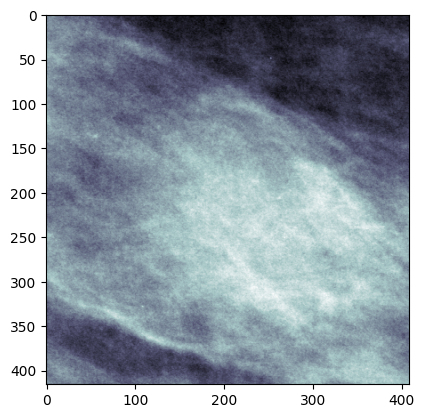

In [84]:
plt.imshow(pydicom.dcmread(X_train[100]).pixel_array, cmap=plt.cm.bone) # Img Original

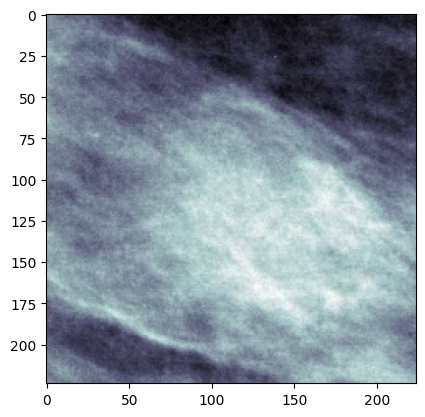

In [85]:
plt.imshow(resize_dicom(pydicom.dcmread(X_train[100]),224,224), cmap=plt.cm.bone) #Img con resize

# Obtencion de imagenes como tensores

In [86]:
#Funcion que les hace resize a las imagenes y obtiene los pixeles resultantes den forma de tensores
def genera_tensores_train_test(width,height,lista_de_rutas):
    """
    width a redimensionar
    height a redimensionar
    lista de rutas
    """
    imgs_tensores = []

    for file in list(lista_de_rutas):
        read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
        img_tensor = resize_dicom(read_img_dicom,width,height) #Lammado a la funcion resize_dicom ---> Tensor de "16 bits" con dtype = float32
        imgs_tensores.append(img_tensor) #juntar los tensores

    # Convertir listas a (arrays de NumPy) Tensores
    imagenes = tf.stack(imgs_tensores) #Axis = 0 por default, concatena en vertical(columnas), axis = 1 en horizontal (filas). --->(num_imgs,width,height,1)
    return imagenes # Tensores


In [87]:
tensor1 = tf.constant([1,1])
tensor2 = tf.constant([2,2])
tensor3 = tf.constant([3,3])

# Apilar los tensores7
F = [tensor1, tensor2, tensor3]
stacked_tensor = tf.stack([tensor1, tensor2, tensor3], axis=0)
print(F)
print(stacked_tensor)

[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>]
tf.Tensor(
[[1 1]
 [2 2]
 [3 3]], shape=(3, 2), dtype=int32)


## Obtencion de las imágenes como tensores (establecer el resize)

imgs_train, imgs_val e imgs_test

In [88]:
imgs_train = genera_tensores_train_test(224,224,X_train)

In [89]:
len(imgs_train)

1031

In [90]:
imgs_val = genera_tensores_train_test(224,224,X_val)

In [91]:
len(imgs_val)

183

In [92]:
imgs_test = genera_tensores_train_test(224,224,rutas_test_mass)

In [93]:
len(imgs_test)

341

# Preprocesamiento

Si Concatenamos imagenes y etiquetas podría genera un "sorted by label", pero usamos train_test_split para evitar esto

In [94]:
#train_images_comb = tf.concat((img_train_calc,img_train_mass),axis=0) #Calc luego Mass

In [95]:
#train_images_comb.shape

In [96]:
#test_images_comb = tf.concat((img_test_calc,img_test_mass),axis=0) #Calc luego Mass

In [97]:
#test_images_comb.shape

In [98]:
#train_labels_comb.shape

In [99]:
#test_labels_comb = tf.concat((etiq_test_calc,etiq_test_mass),axis=0) #Calc luego Mass

In [100]:
#test_labels_comb.shape

Shuffle par evitar el soted by label


In [101]:
#Obtener el tamano del batch
#batch_size = tf.shape(train_images_comb)[0]

In [102]:
#int(batch_size)

In [103]:
#Generamos una permutacion aleatoria de los indices
#perm = tf.random.shuffle(tf.range(batch_size), seed=42)

In [104]:
#perm

In [105]:
#Shuffled train images and labels

#train_images_comb = tf.gather(train_images_comb,perm)
#train_labels_comb = tf.gather(train_labels_comb,perm)

# Preprocesamiento 1:

In [106]:
# Convertir del rango (0-65535) a (0-255). Recordemos que  2**8 =  (DATOS(2**16)/2**8) neq (65535/65535)*255
train_images_mass = (imgs_train/65535)*255
val_images_mass = (imgs_val/65535)*255
test_images_mass = (imgs_test/65535)*255

In [107]:
#Replicate the only color channel (gray) 3 times, for Pre-trained Nets compatibility (se puede usar tf.TILE)
train_images_mass  = tf.image.grayscale_to_rgb(train_images_mass)
val_images_mass = tf.image.grayscale_to_rgb(val_images_mass)
test_images_mass = tf.image.grayscale_to_rgb(test_images_mass)

In [108]:
train_images_mass.shape

TensorShape([1031, 224, 224, 3])

In [109]:
val_images_mass.shape

TensorShape([183, 224, 224, 3])

In [110]:
test_images_mass

<tf.Tensor: shape=(341, 224, 224, 3), dtype=float32, numpy=
array([[[[198.54288 , 198.54288 , 198.54288 ],
         [202.72948 , 202.72948 , 202.72948 ],
         [201.89041 , 201.89041 , 201.89041 ],
         ...,
         [202.3872  , 202.3872  , 202.3872  ],
         [198.6291  , 198.6291  , 198.6291  ],
         [196.28775 , 196.28775 , 196.28775 ]],

        [[199.23979 , 199.23979 , 199.23979 ],
         [201.64929 , 201.64929 , 201.64929 ],
         [196.69    , 196.69    , 196.69    ],
         ...,
         [201.05974 , 201.05974 , 201.05974 ],
         [196.58028 , 196.58028 , 196.58028 ],
         [197.25252 , 197.25252 , 197.25252 ]],

        [[202.11418 , 202.11418 , 202.11418 ],
         [201.99046 , 201.99046 , 201.99046 ],
         [198.87268 , 198.87268 , 198.87268 ],
         ...,
         [197.1758  , 197.1758  , 197.1758  ],
         [196.82816 , 196.82816 , 196.82816 ],
         [197.71243 , 197.71243 , 197.71243 ]],

        ...,

        [[221.51677 , 221.51677 

CNNs preprocess inputs

In [111]:
from keras import models
from keras.applications.vgg19 import preprocess_input as  vgg19_preprocess_input
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.resnet import preprocess_input as res_preprocess_input
from keras.applications.inception_v3 import preprocess_input as inv3_preprocess_input
from keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess_input
from keras.applications.densenet import preprocess_input as dens_preprocess_input


Load Models

In [112]:
mod_vgg19 = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\vgg19_FT_5layer_2cl_M-B_end_32_DO_HARD.h5')

In [113]:
mod_vgg16 = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\vgg16_FT_3layer_2cl_M-B_end_64_DO_HARD.h5')

In [114]:
mod_dens = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\dens_fe_2cl_M-B_best_512_DO_HARD.h5')

In [115]:
mod_res = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\res_FT_2layer_2cl_M-B_best_128_DO_HARD.h5')

In [117]:
mod_mob = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\mob_fe_2cl_M-B_best_256_DO_HARD.h5')

In [118]:
mod_inv3 = models.load_model(r'E:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\inv3_fe_2cl_M-B_best_64_DO_HARD.h5')

Test predictions

In [119]:
pred_test_vgg19 = mod_vgg19.predict(vgg19_preprocess_input(test_images_mass))

11/11 [==============================] - 5s 148ms/step


In [121]:
pred_test_vgg16 = mod_vgg16.predict(vgg16_preprocess_input(test_images_mass))

11/11 [==============================] - 1s 55ms/step


In [122]:
pred_test_dens = mod_dens.predict(dens_preprocess_input(test_images_mass))

11/11 [==============================] - 1s 36ms/step


In [123]:
pred_test_res = mod_res.predict(res_preprocess_input(test_images_mass))

11/11 [==============================] - 1s 27ms/step


In [124]:
pred_test_mob = mod_mob.predict(mob_preprocess_input(test_images_mass))

11/11 [==============================] - 0s 11ms/step


In [125]:
pred_test_inv3 = mod_inv3.predict(inv3_preprocess_input(test_images_mass))

11/11 [==============================] - 1s 25ms/step


Dictionary models to obtain all votings combinations

In [126]:
import itertools

In [127]:
def generate_subsets(arr):
    n = len(arr)
    subsets = []
    for r in range(2, n+1):  # From 2 to the n, excluying "empty set" and the individuals CNNs
        subsets.extend(itertools.combinations(arr, r))
    return subsets

In [128]:
cnns_names = ['VGG16','VGG19','DenseNet121','InceptionV3','ResNet50','MobileNetV2']


In [129]:
cnns_preds_test = [pred_test_vgg16,pred_test_vgg19,pred_test_dens,pred_test_inv3,pred_test_res, pred_test_mob]

In [130]:
cnns_and_preds = {name: preds for name, preds in zip(cnns_names,cnns_preds_test)}

In [131]:
subset_names = generate_subsets(cnns_names)

In [132]:
subset_names

[('VGG16', 'VGG19'),
 ('VGG16', 'DenseNet121'),
 ('VGG16', 'InceptionV3'),
 ('VGG16', 'ResNet50'),
 ('VGG16', 'MobileNetV2'),
 ('VGG19', 'DenseNet121'),
 ('VGG19', 'InceptionV3'),
 ('VGG19', 'ResNet50'),
 ('VGG19', 'MobileNetV2'),
 ('DenseNet121', 'InceptionV3'),
 ('DenseNet121', 'ResNet50'),
 ('DenseNet121', 'MobileNetV2'),
 ('InceptionV3', 'ResNet50'),
 ('InceptionV3', 'MobileNetV2'),
 ('ResNet50', 'MobileNetV2'),
 ('VGG16', 'VGG19', 'DenseNet121'),
 ('VGG16', 'VGG19', 'InceptionV3'),
 ('VGG16', 'VGG19', 'ResNet50'),
 ('VGG16', 'VGG19', 'MobileNetV2'),
 ('VGG16', 'DenseNet121', 'InceptionV3'),
 ('VGG16', 'DenseNet121', 'ResNet50'),
 ('VGG16', 'DenseNet121', 'MobileNetV2'),
 ('VGG16', 'InceptionV3', 'ResNet50'),
 ('VGG16', 'InceptionV3', 'MobileNetV2'),
 ('VGG16', 'ResNet50', 'MobileNetV2'),
 ('VGG19', 'DenseNet121', 'InceptionV3'),
 ('VGG19', 'DenseNet121', 'ResNet50'),
 ('VGG19', 'DenseNet121', 'MobileNetV2'),
 ('VGG19', 'InceptionV3', 'ResNet50'),
 ('VGG19', 'InceptionV3', 'MobileN

# Functions Results

In [133]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [139]:
class_labels_Mass = ['Mass Malignant', 'Mass Benign'] #0,1

In [135]:
metrics = ['accuracy', 'f1','matthews_corrcoef','precision','recall']


In [140]:
#individual resullt
def plot_mc_nets(name_model,y_pred_proba,y_test):
    #y_pred_proba = Model.predict(X_test)
    y_pred_class = (y_pred_proba>=0.5).astype(int)
    
    ######## DataFrame Test #########
    cols_metrics = ['Metrics on Test and Model']+metrics
    resul_test = pd.DataFrame(columns=cols_metrics)
    resul_test.set_index('Metrics on Test and Model', inplace=True)
    resul_test.loc[f'{name_model}']=[0]*(len(cols_metrics)-1)
    resul_test.iloc[0,0] =  accuracy_score(y_test,y_pred_class)
    resul_test.iloc[0,1] = f1_score(y_test,y_pred_class)
    resul_test.iloc[0,2] =  matthews_corrcoef(y_test,y_pred_class)
    resul_test.iloc[0,3] = precision_score(y_test,y_pred_class)
    resul_test.iloc[0,4] = recall_score(y_test,y_pred_class)
    

    cm = confusion_matrix(y_test,y_pred_class)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={"size": 22}, xticklabels=class_labels_Mass,yticklabels=class_labels_Mass)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Predicted labels', fontsize=20)
    plt.ylabel('Actual labels', fontsize=20)
    plt.title(f'{name_model}', fontsize=18)
    plt.savefig(f'indiv_M-B_{name_model}.png')

    plt.show
    
    return resul_test

In [141]:
def plot_voting_mc_test(name_models,predictions_models,y_test):#Stacked predictions with preprocess input
       
    predictions = np.mean(predictions_models, axis=1, keepdims=True)
    y_pred_class = (predictions >= 0.5).astype(int)
    
    ######## DataFrame Test #########
    cols_metrics = ['Metrics on Test and Votings']+metrics
    resul_vots = pd.DataFrame(columns=cols_metrics)
    resul_vots.set_index('Metrics on Test and Votings', inplace=True)
    resul_vots.loc[f'{name_models}']=[0]*(len(cols_metrics)-1)
    resul_vots.iloc[0,0] =  accuracy_score(y_test,y_pred_class)
    resul_vots.iloc[0,1] = f1_score(y_test,y_pred_class)
    resul_vots.iloc[0,2] =  matthews_corrcoef(y_test,y_pred_class)
    resul_vots.iloc[0,3] = precision_score(y_test,y_pred_class)
    resul_vots.iloc[0,4] = recall_score(y_test,y_pred_class)
    
    ##### Matrix Confucion "cm"
    cm = confusion_matrix(y_test,y_pred_class)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, cmap='Blues',fmt='d',cbar=False,annot_kws={"size": 22}, xticklabels=class_labels_Mass,yticklabels=class_labels_Mass)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Predicted labels', fontsize=20)
    plt.ylabel('Actual labels', fontsize=20)
    plt.title(f'Votings {name_models}', fontsize=18)
    plt.savefig(f'voings_M-B_{name_models}.png')
    plt.show
    
    return resul_vots

# Individual Results

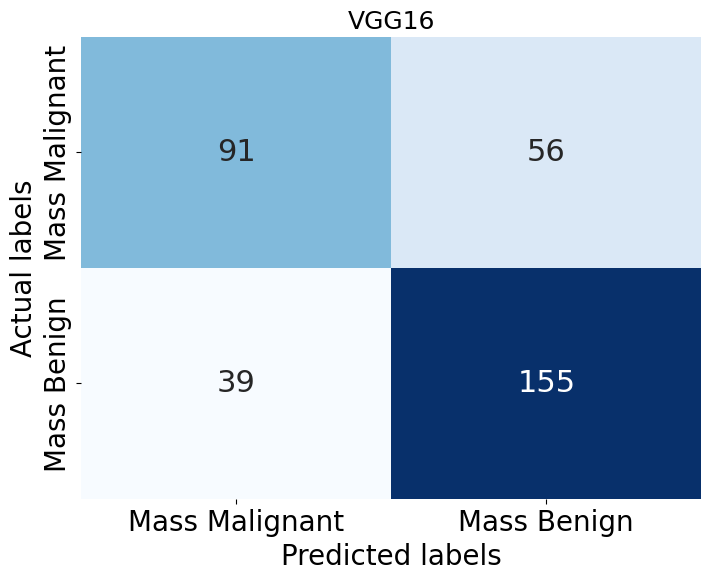

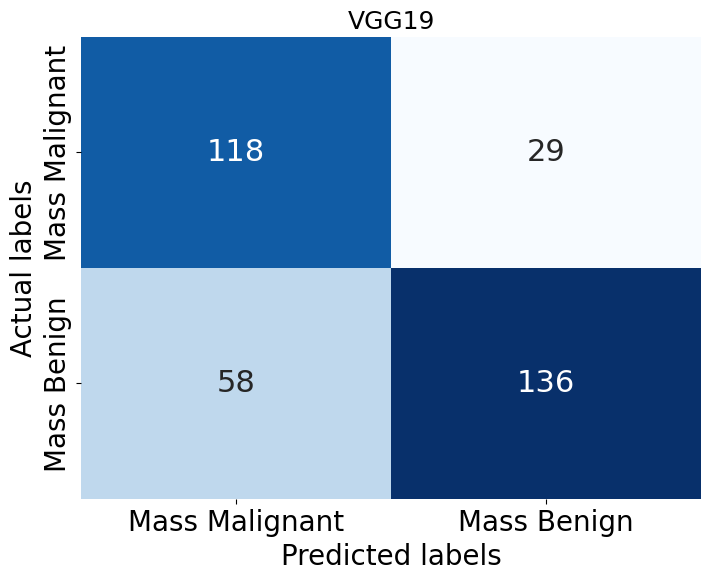

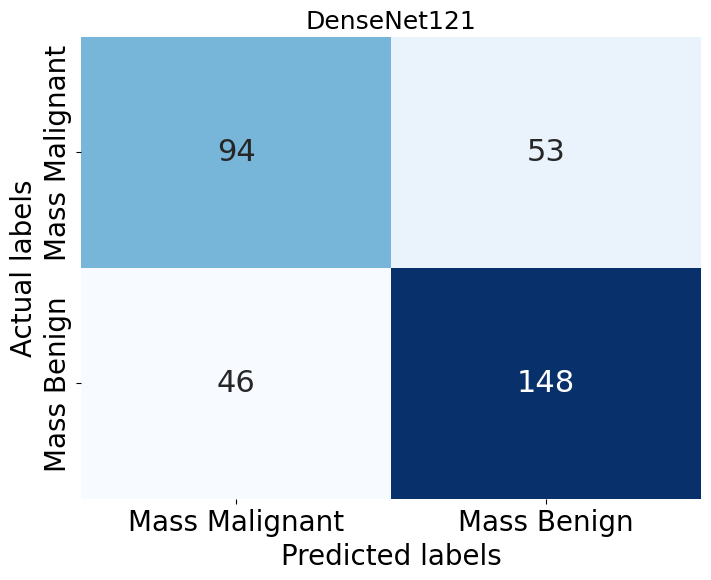

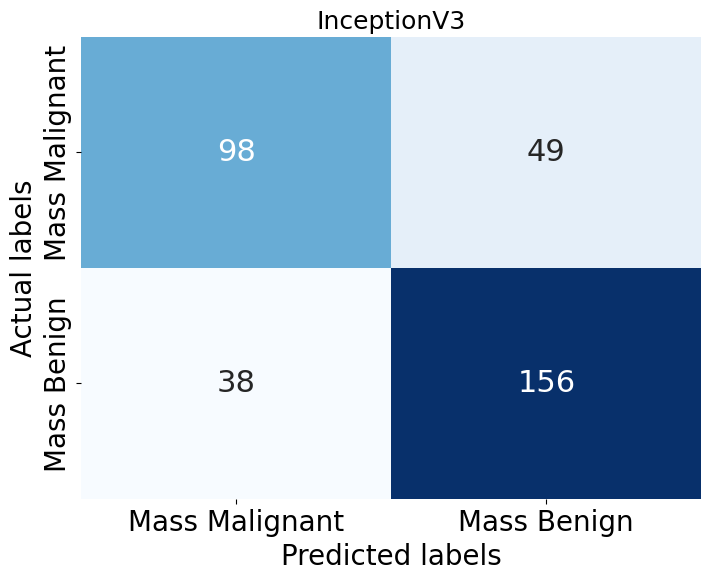

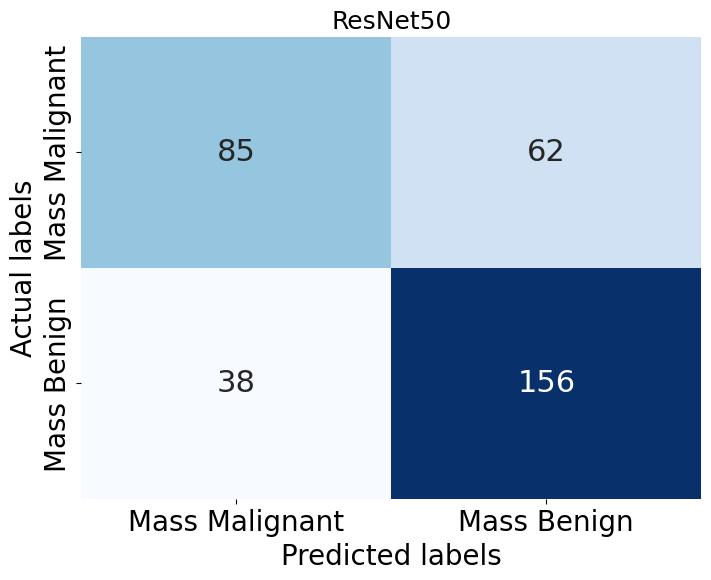

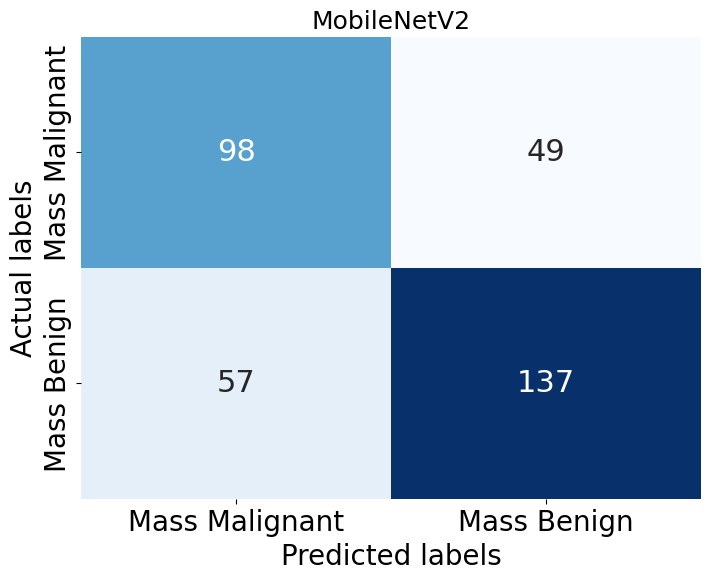

In [144]:
df_indiv_results_list=[]
for name,preds in cnns_and_preds.items():
    df_metrics_and_models = plot_mc_nets(name,preds,etiq_test_mass)
    df_indiv_results_list.append(df_metrics_and_models)
        

In [145]:
all_indiv_results = pd.concat(df_indiv_results_list, axis=0, ignore_index=False)
all_indiv_results

,accuracy,f1,matthews_corrcoef,precision,recall
Metrics on Test and Model,,,,,
VGG16,0.721408,0.765432,0.426226,0.734597,0.798969
VGG19,0.744868,0.757660,0.499204,0.824242,0.701031
DenseNet121,0.709677,0.749367,0.405036,0.736318,0.762887
InceptionV3,0.744868,0.781955,0.476147,0.760976,0.804124
ResNet50,0.706745,0.757282,0.394317,0.715596,0.804124
MobileNetV2,0.689150,0.721053,0.370829,0.736559,0.706186


C:\Users\uabc_\AppData\Local\Temp\ipykernel_24200\3155793058.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


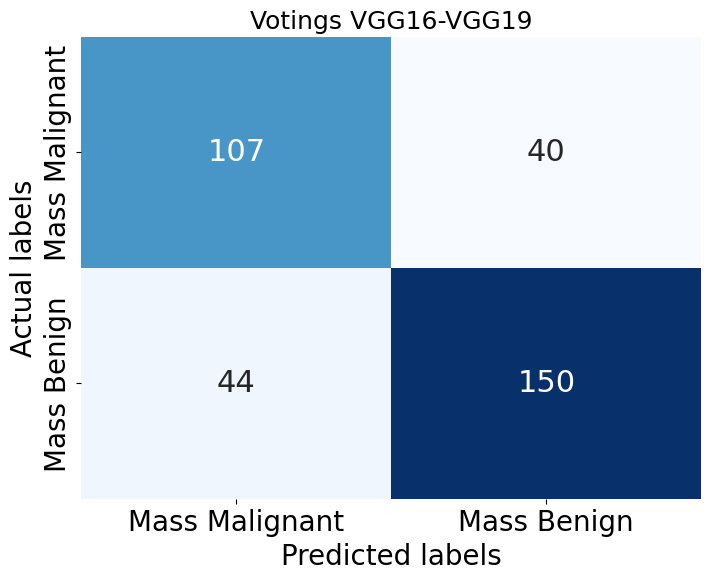

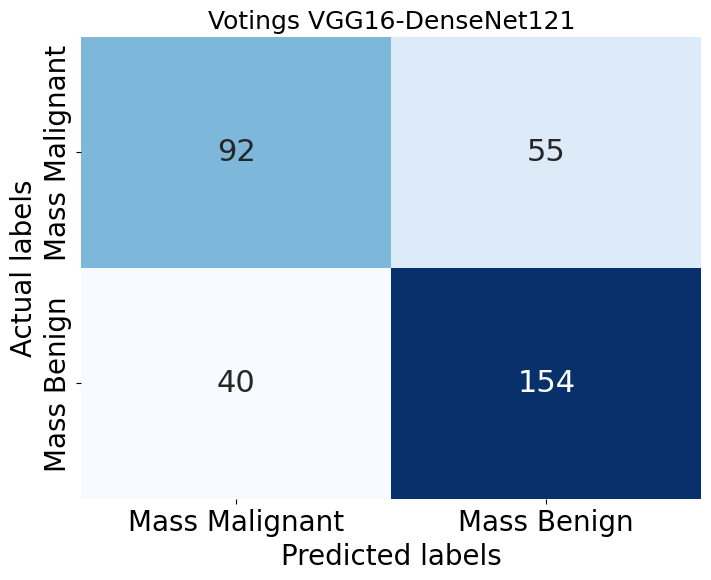

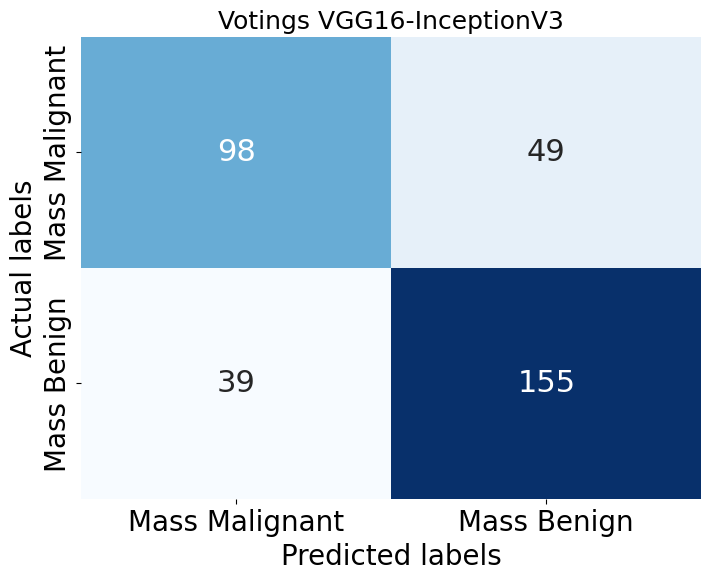

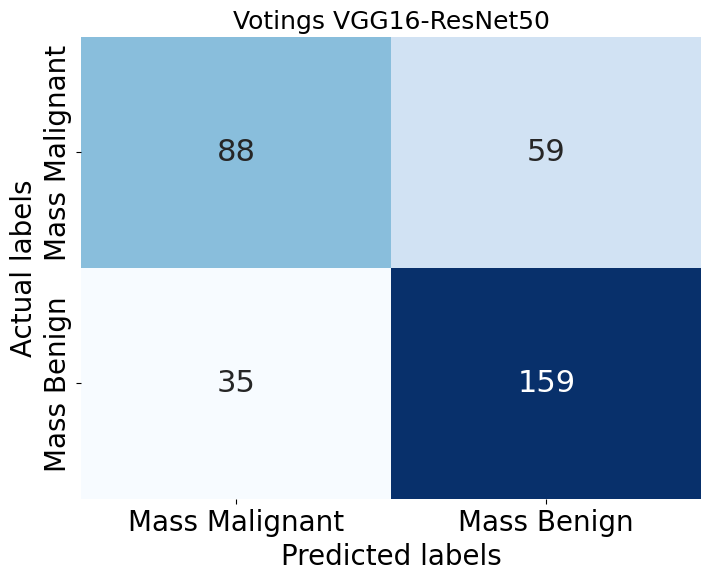

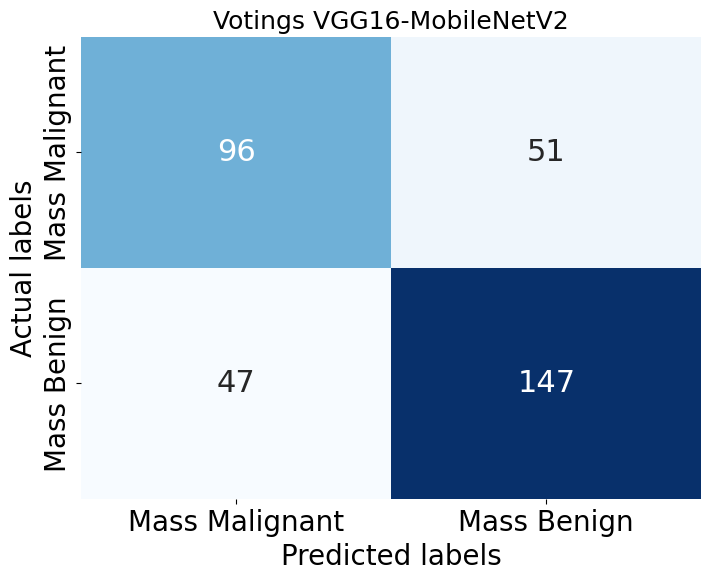

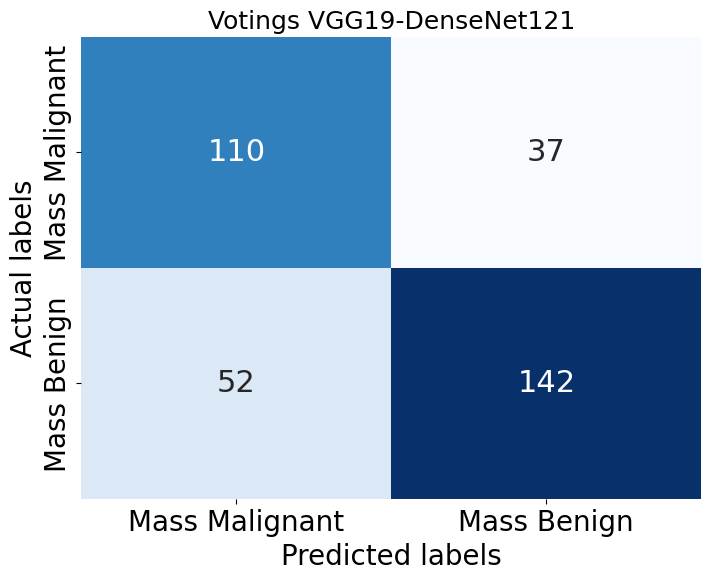

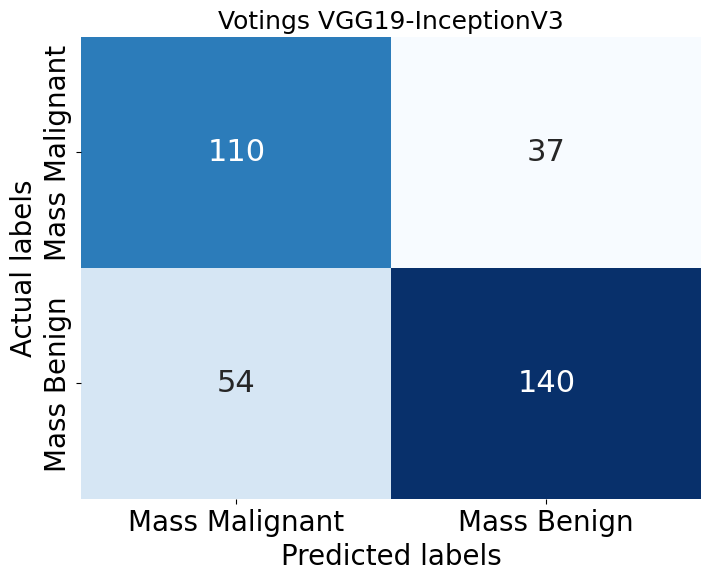

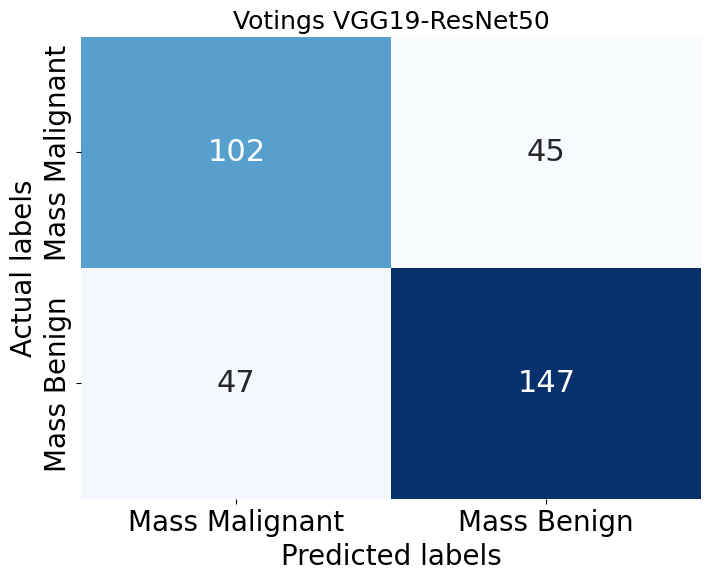

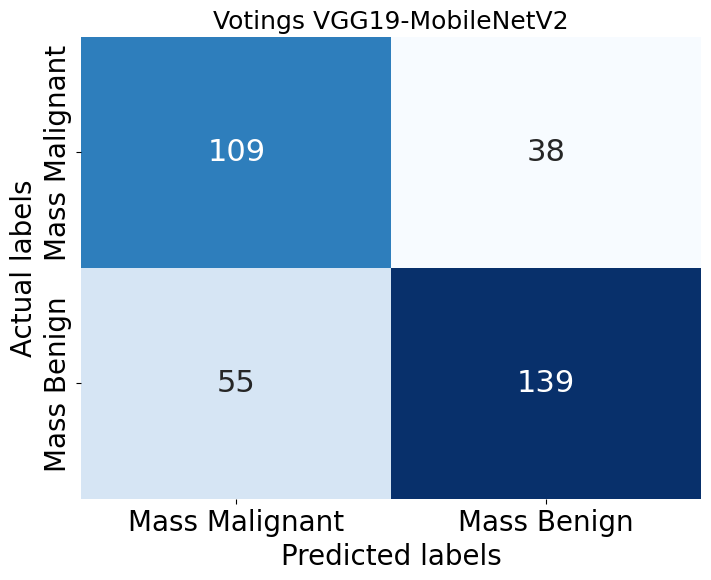

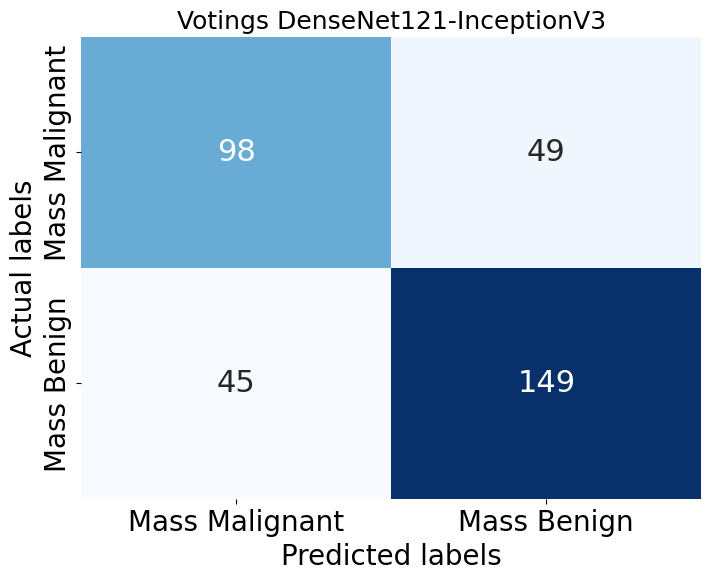

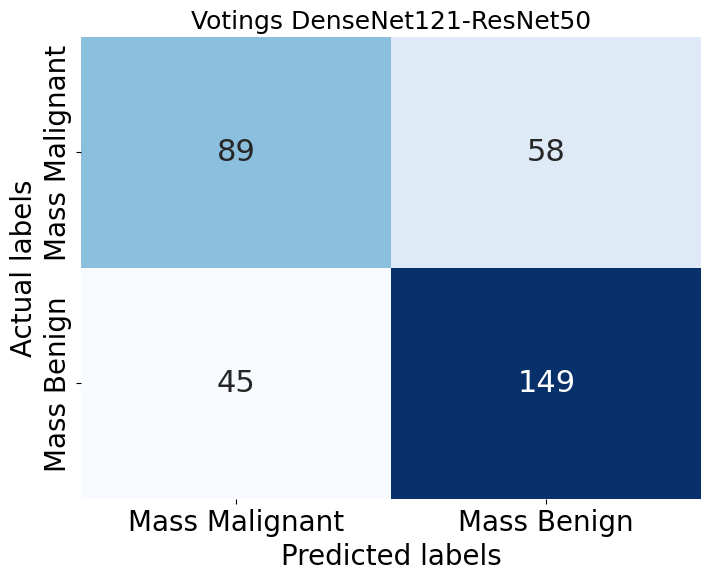

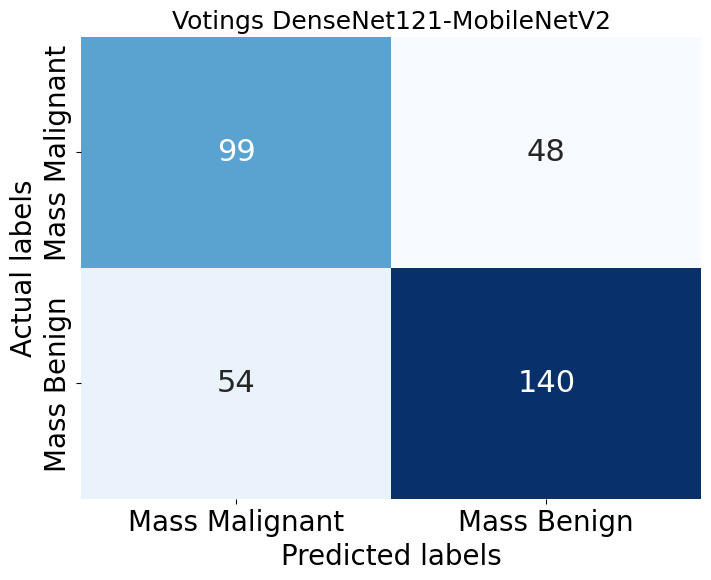

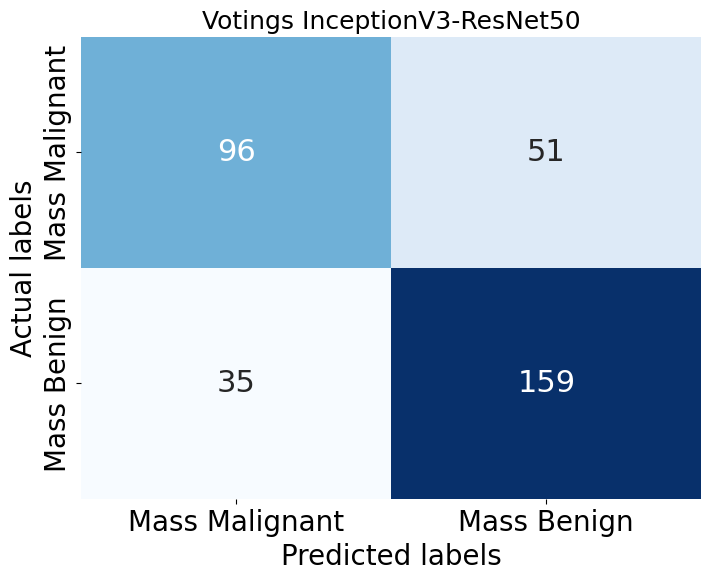

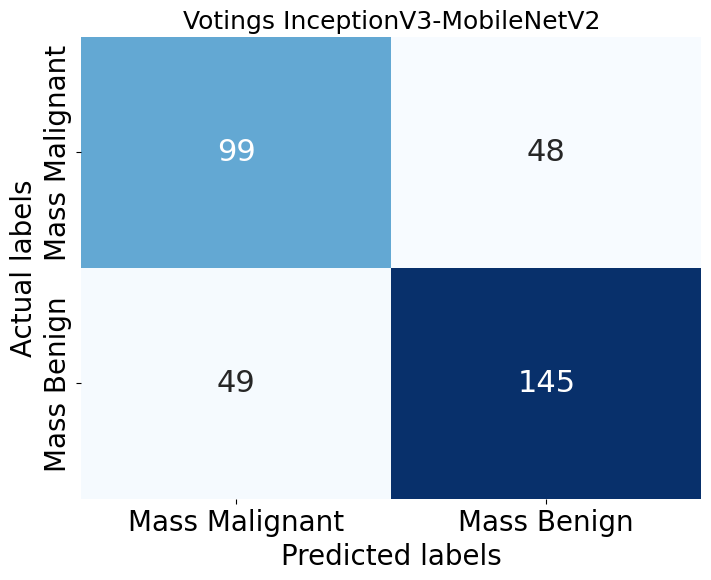

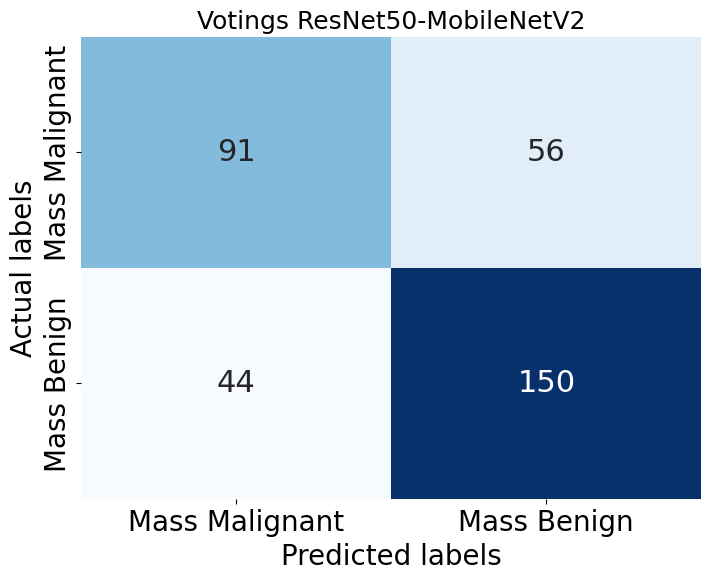

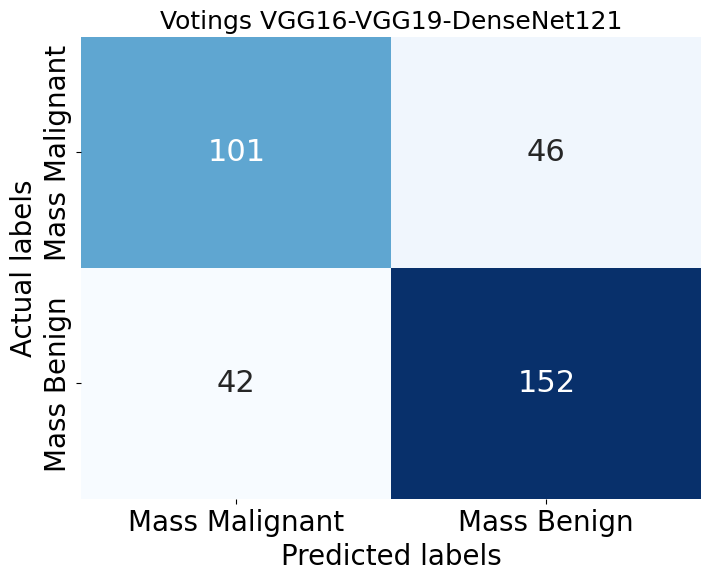

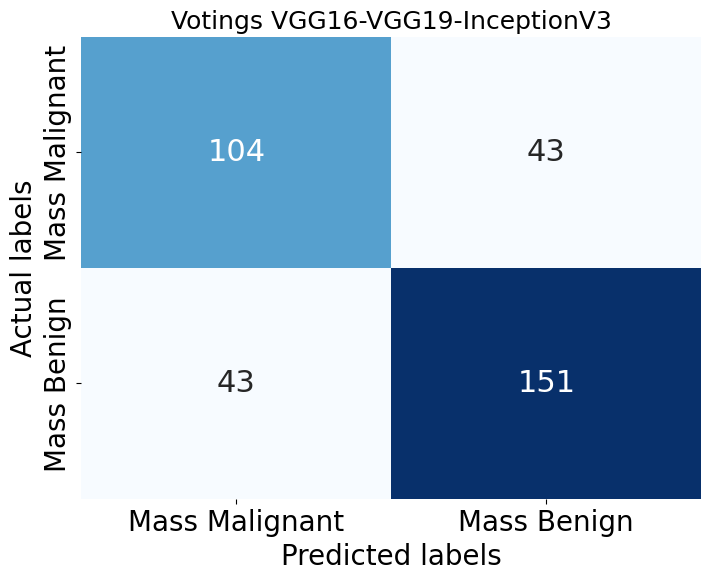

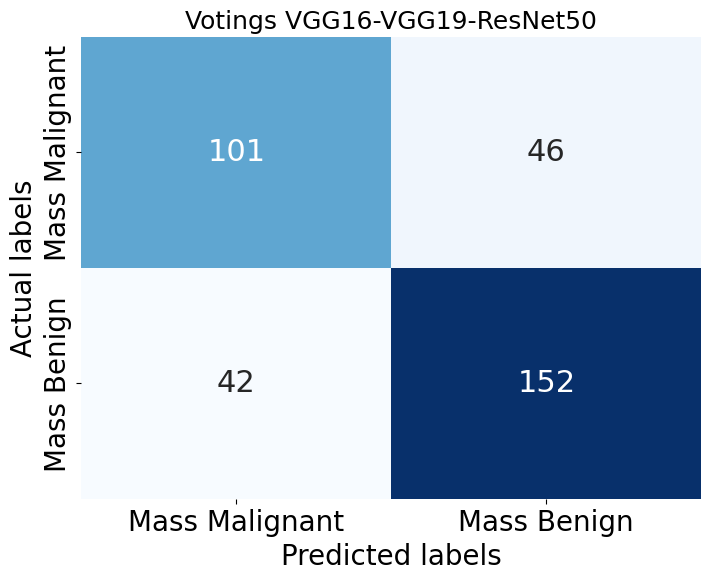

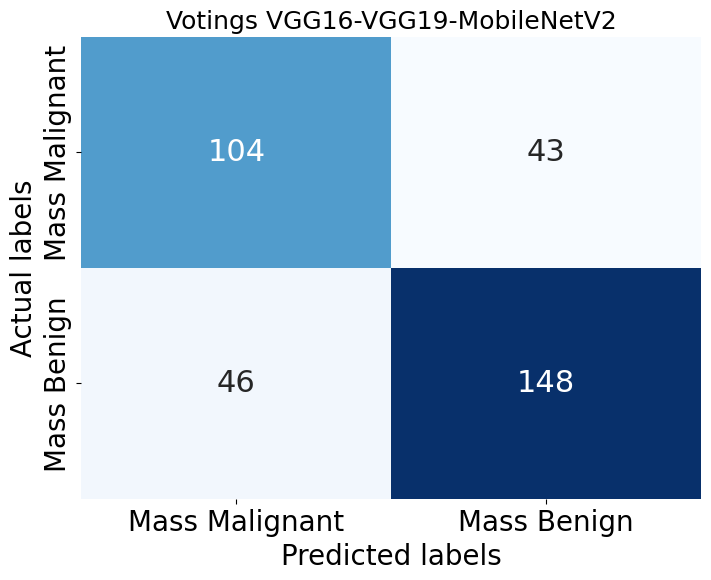

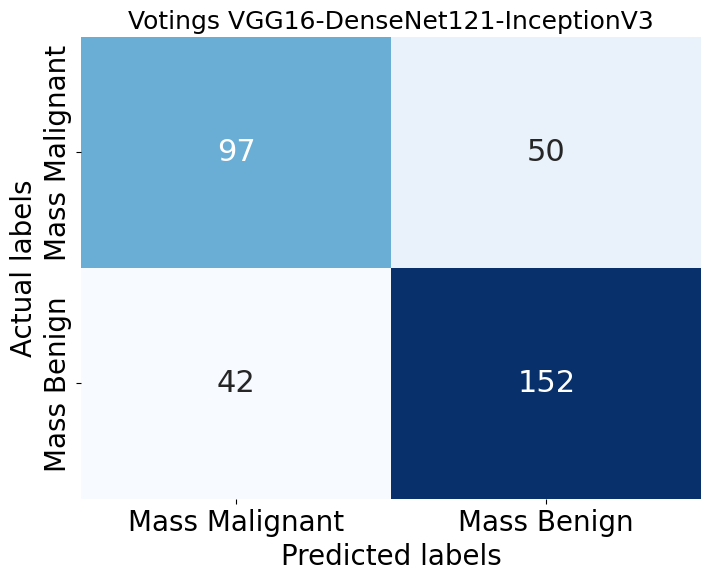

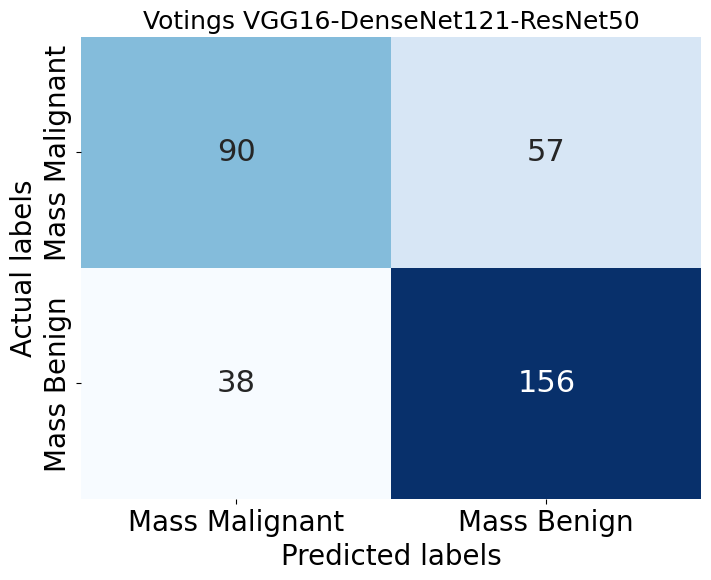

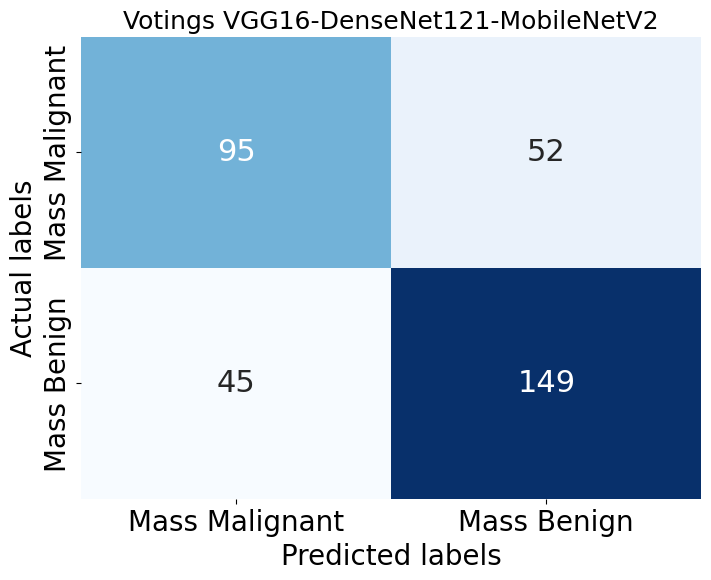

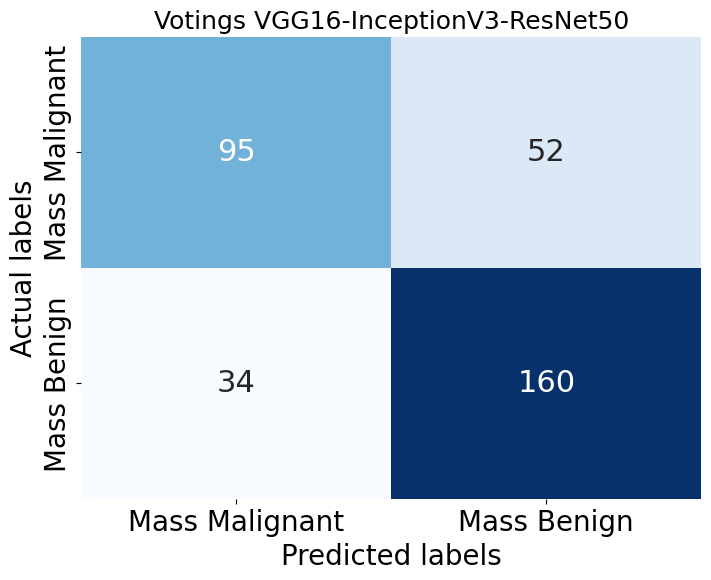

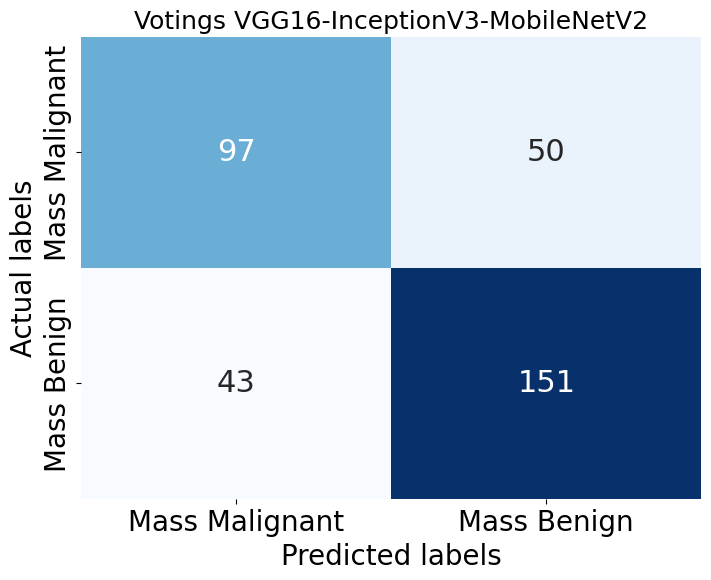

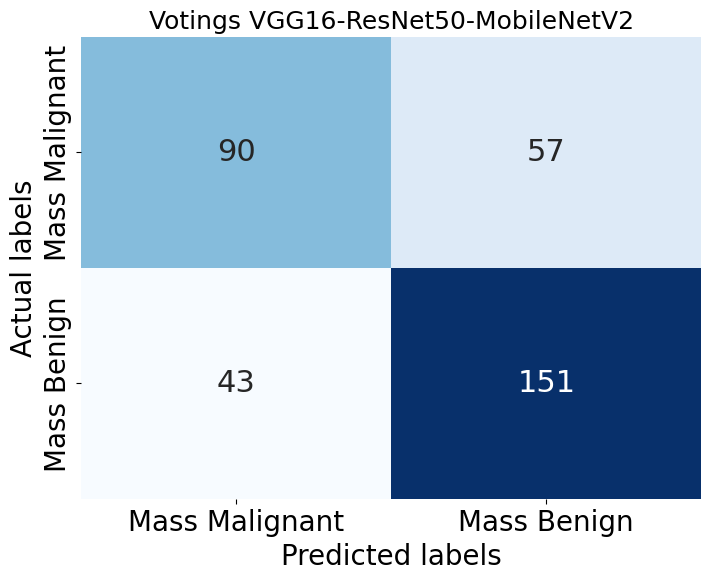

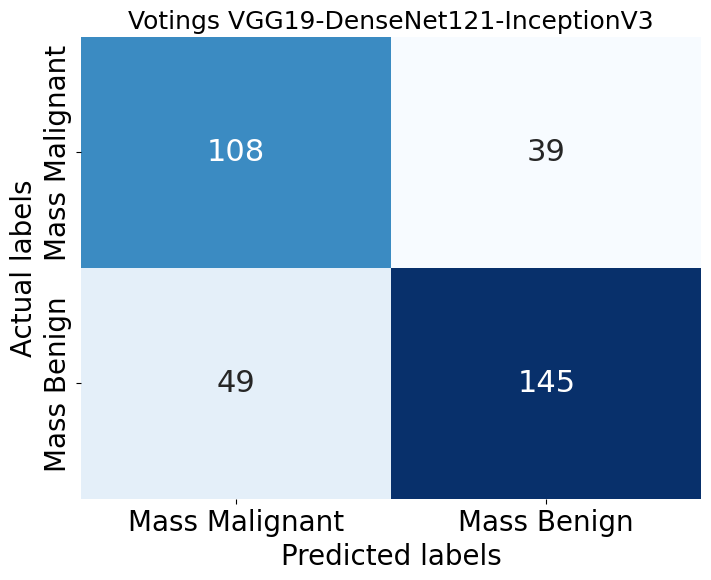

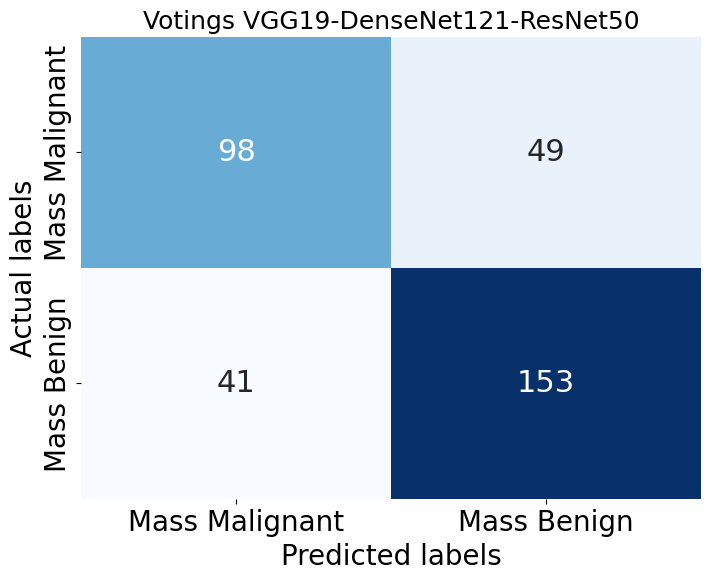

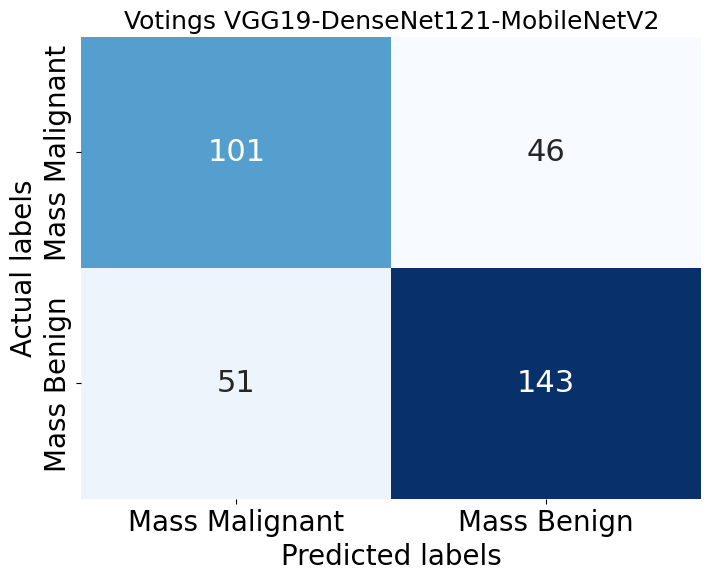

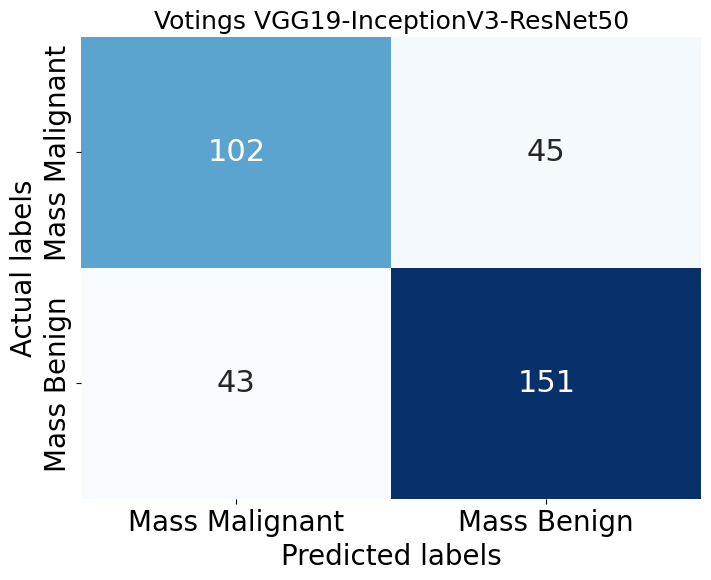

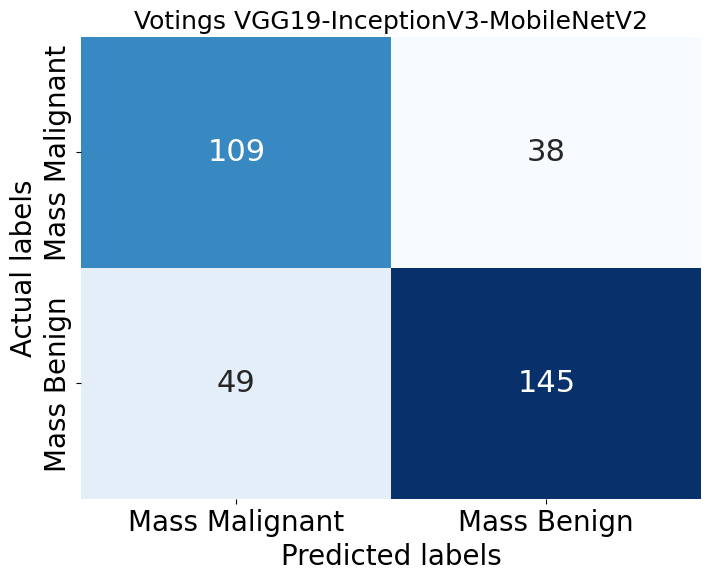

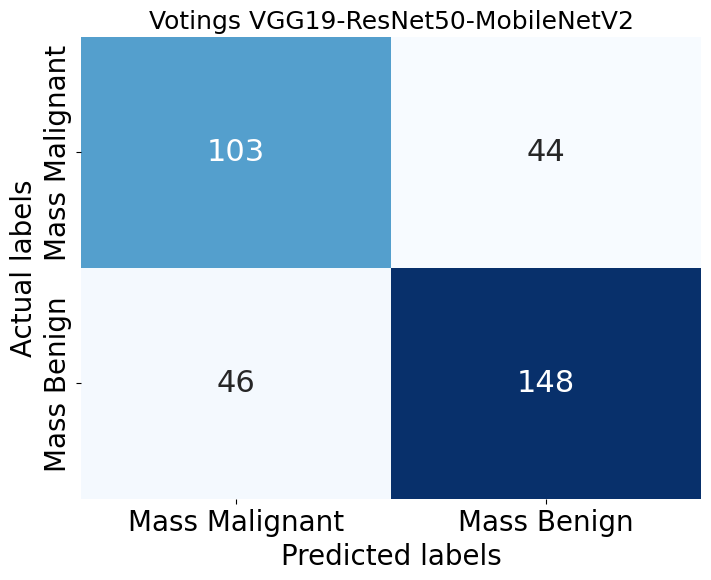

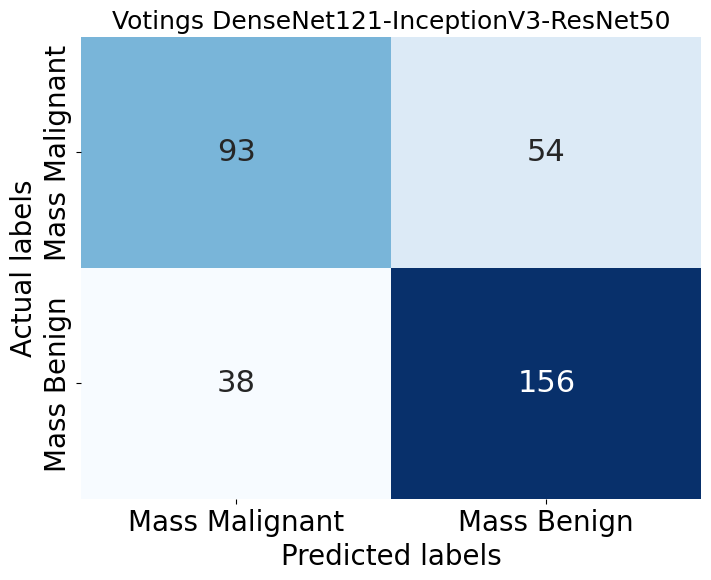

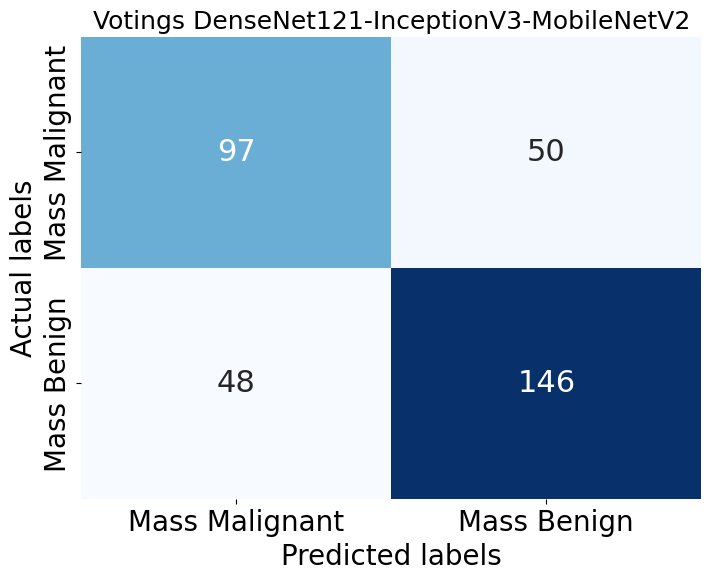

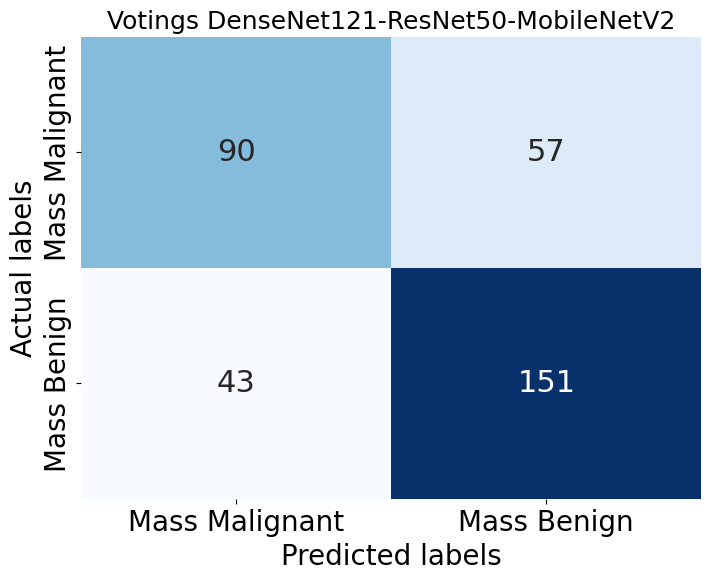

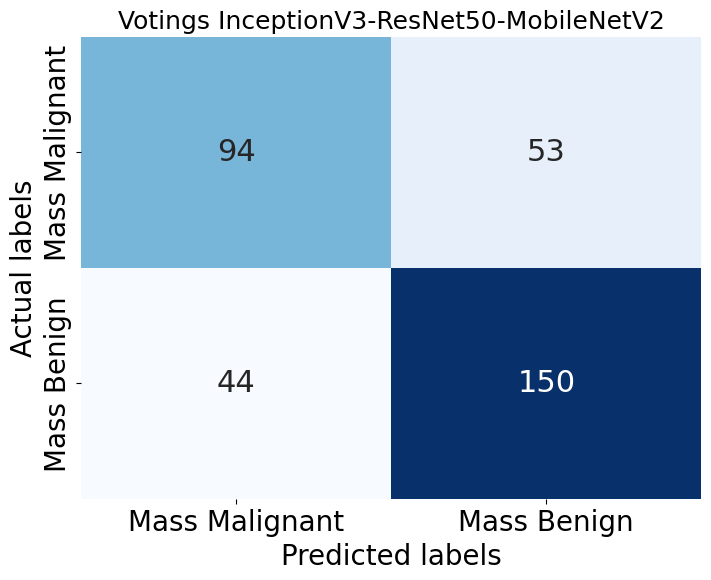

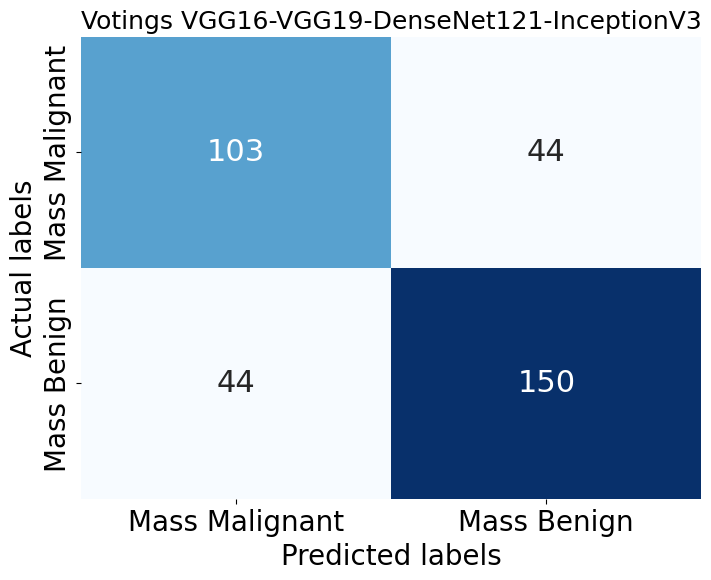

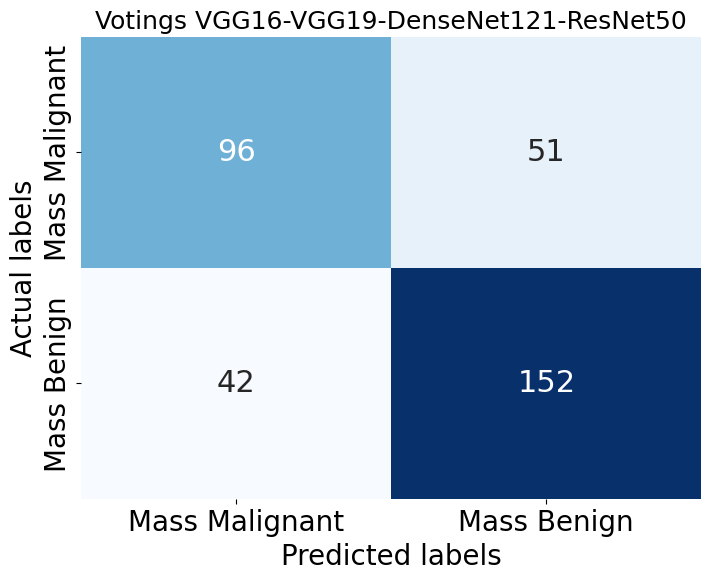

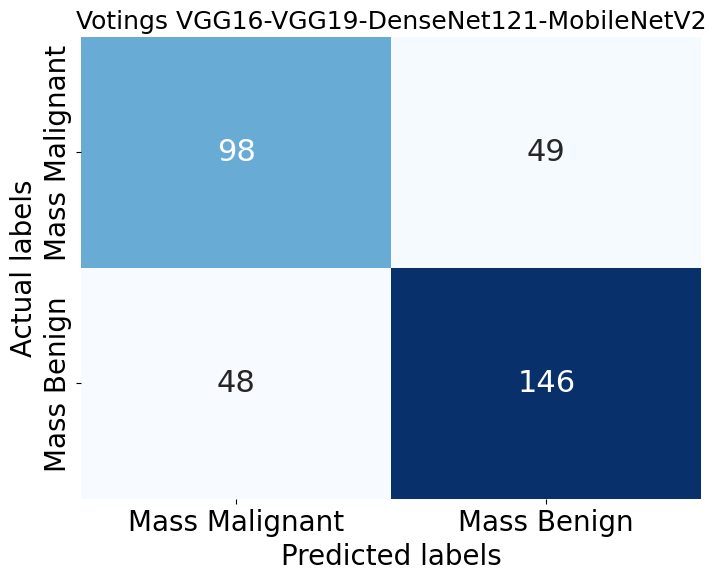

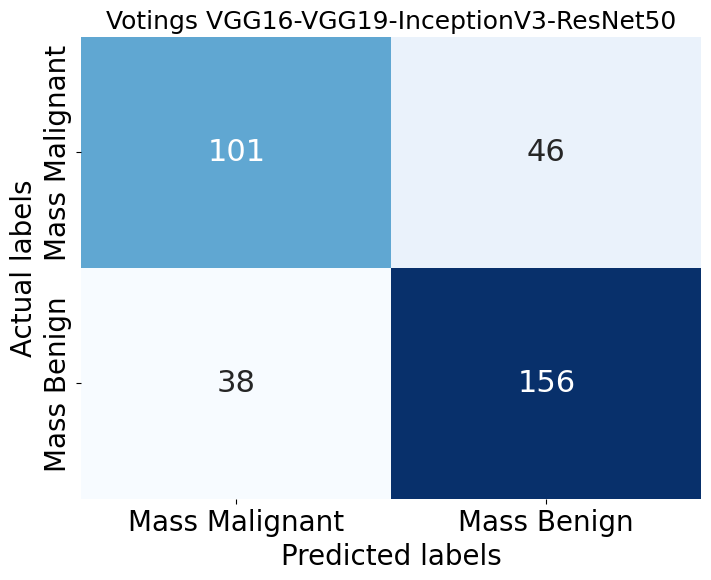

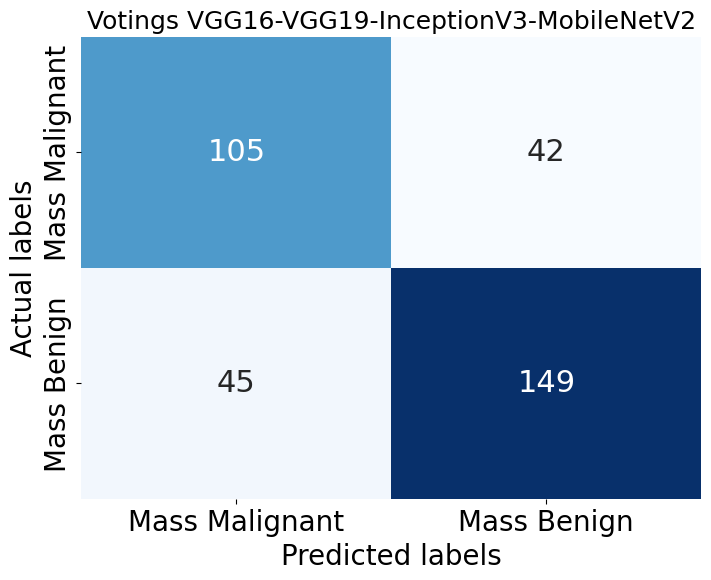

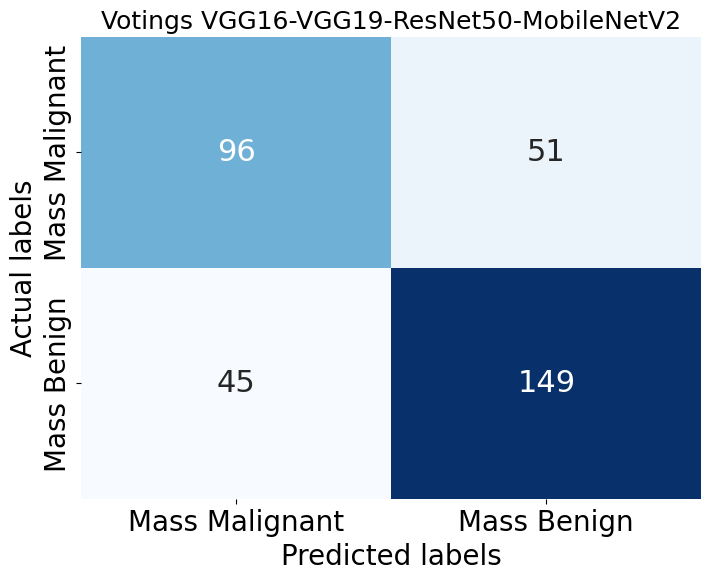

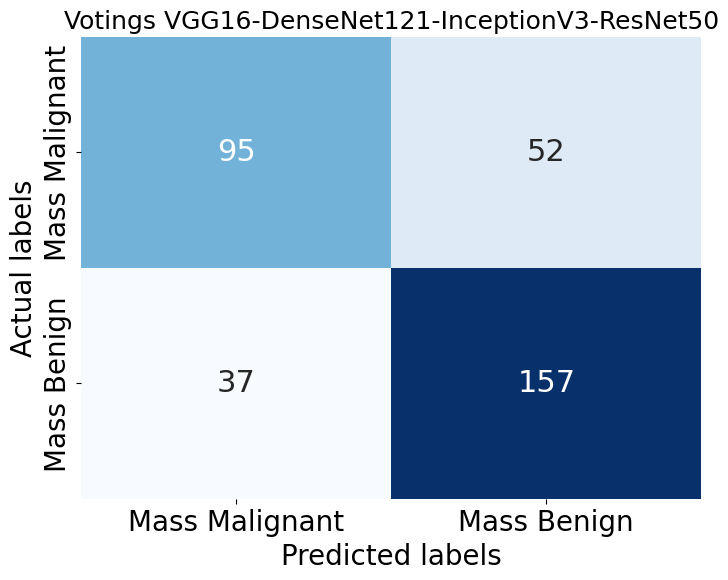

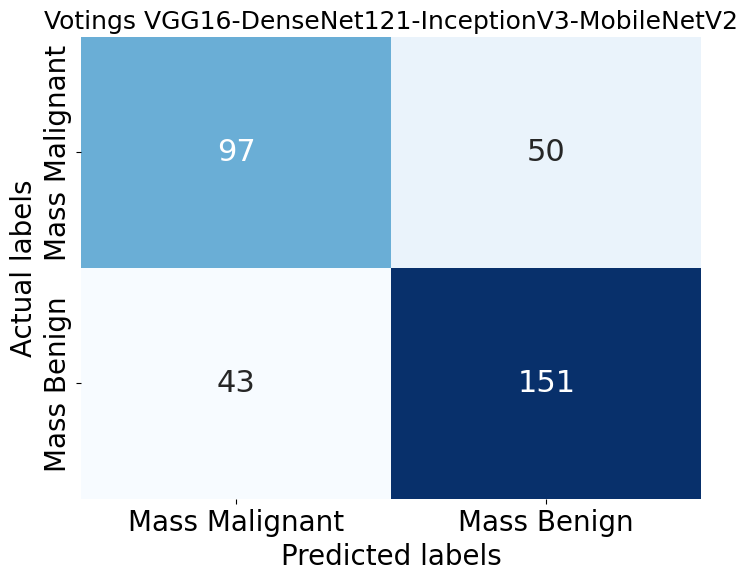

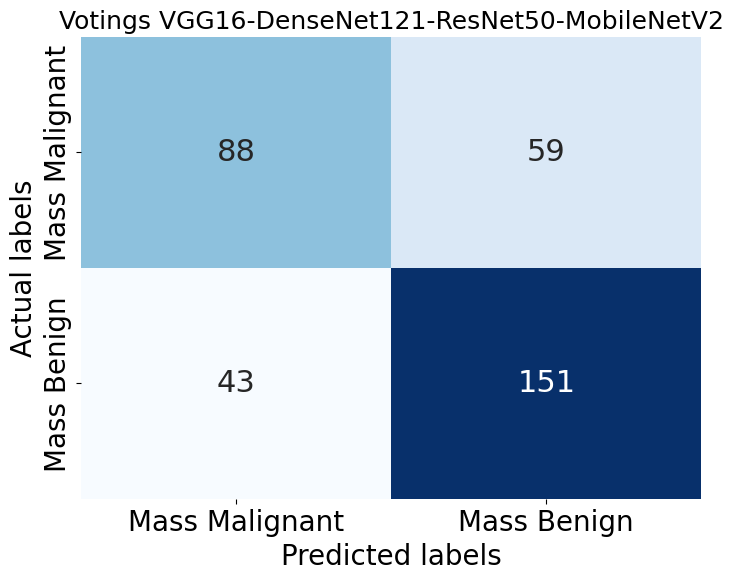

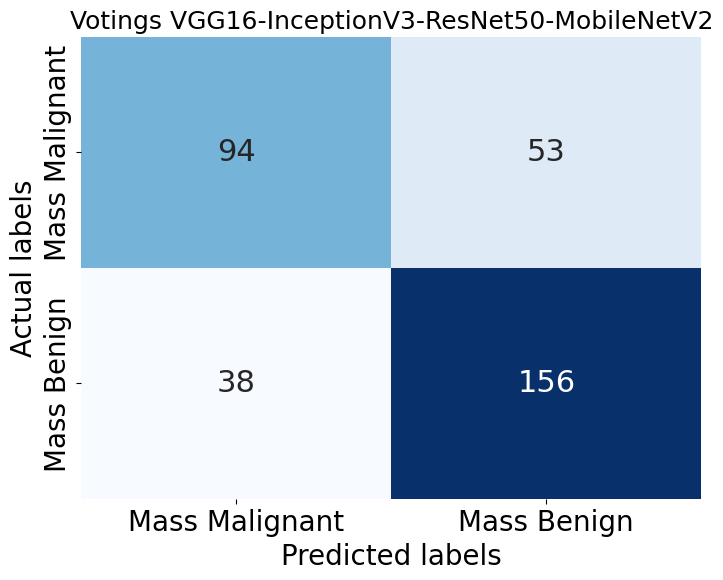

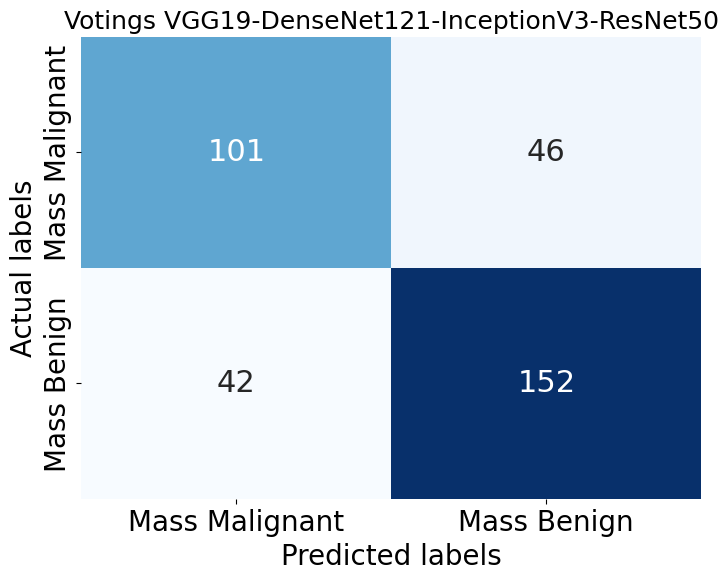

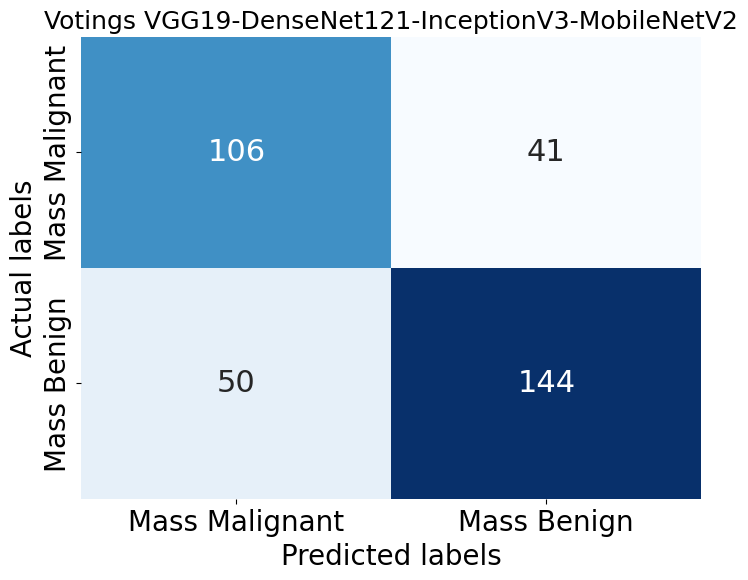

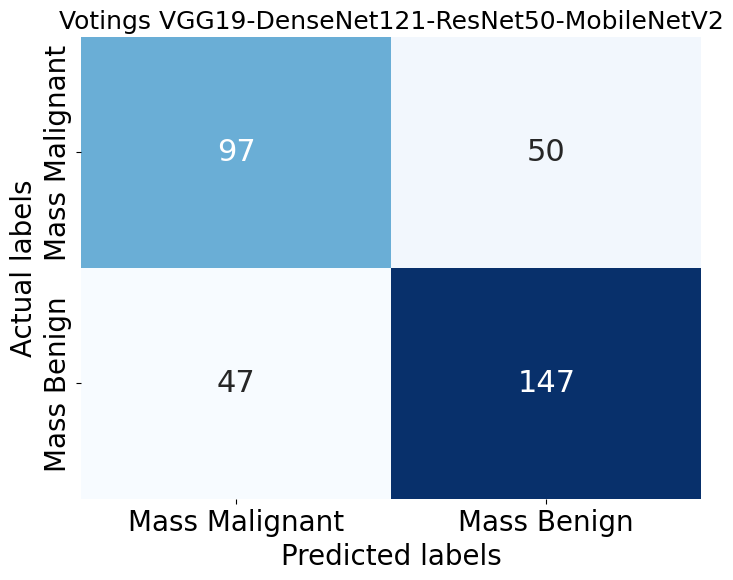

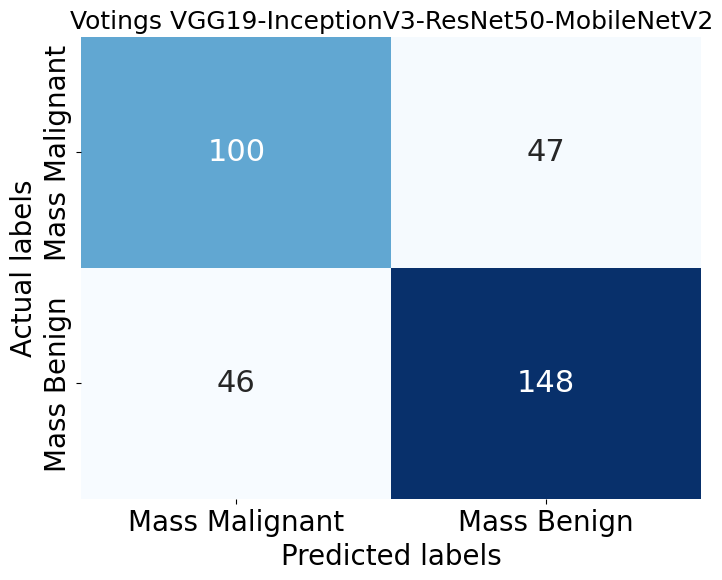

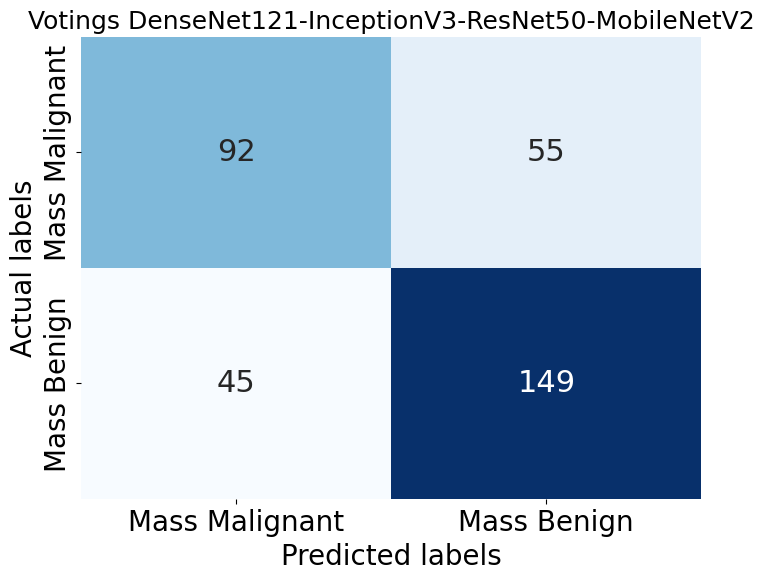

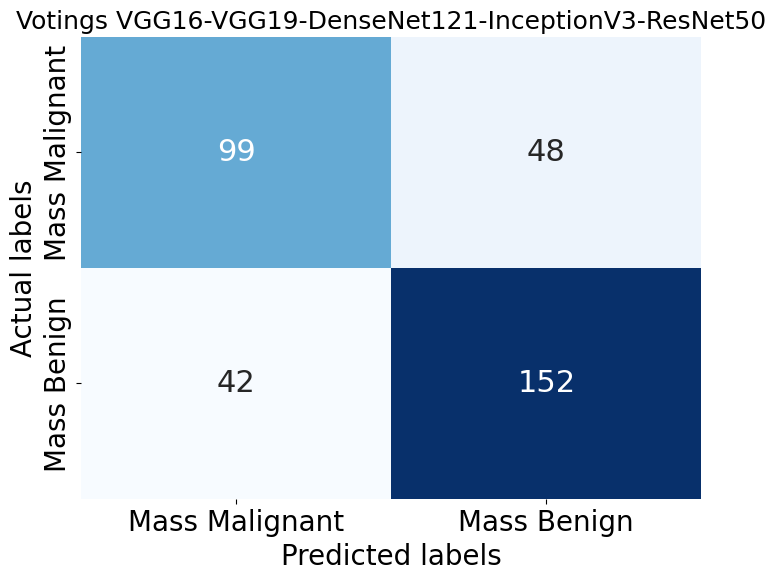

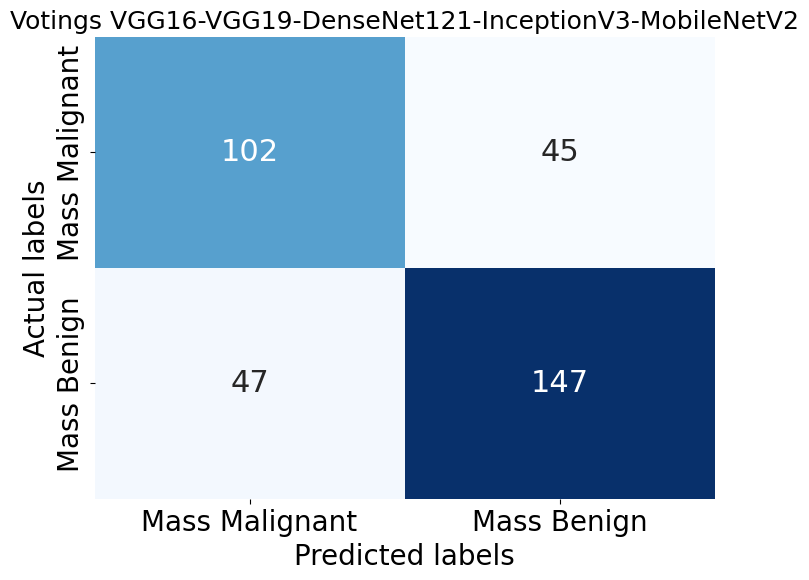

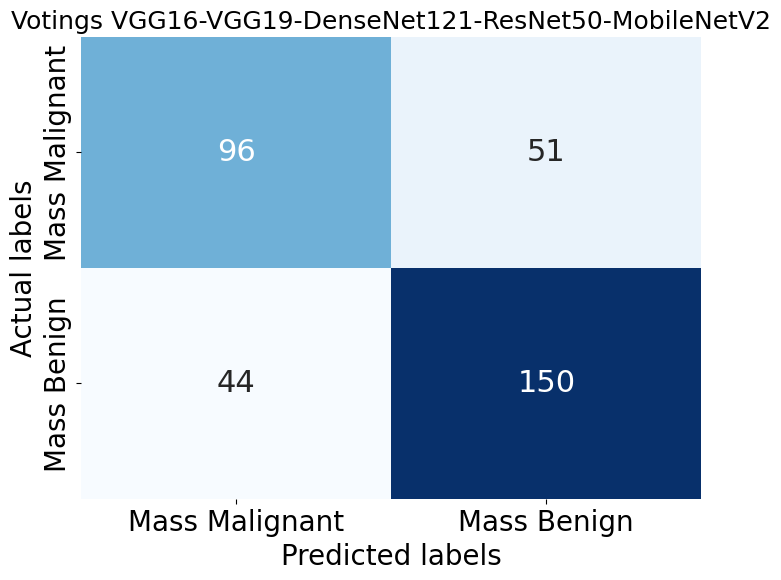

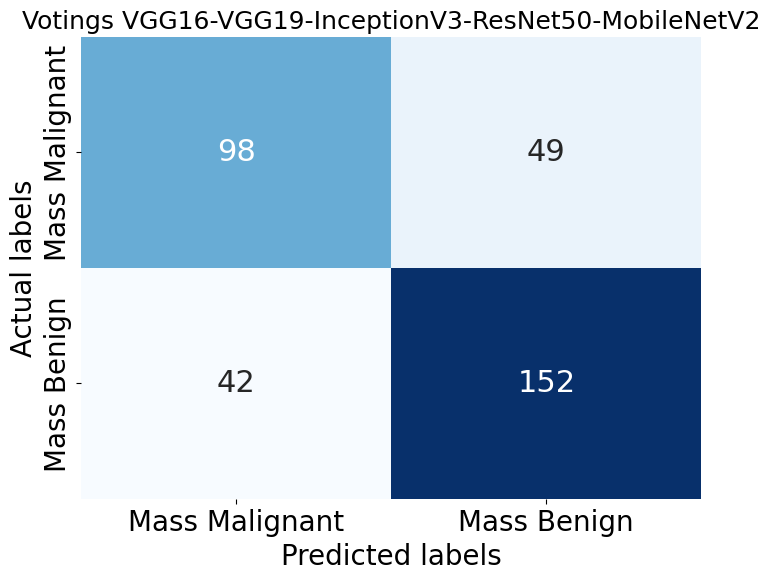

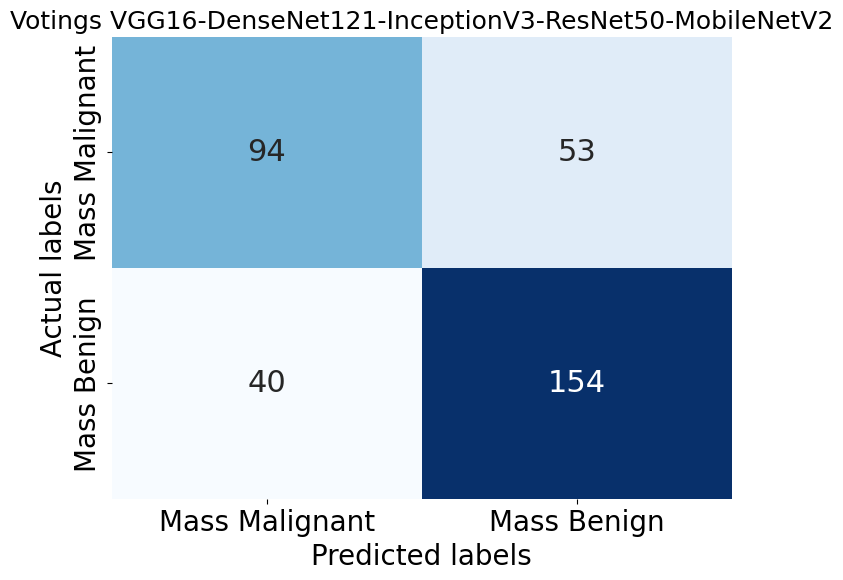

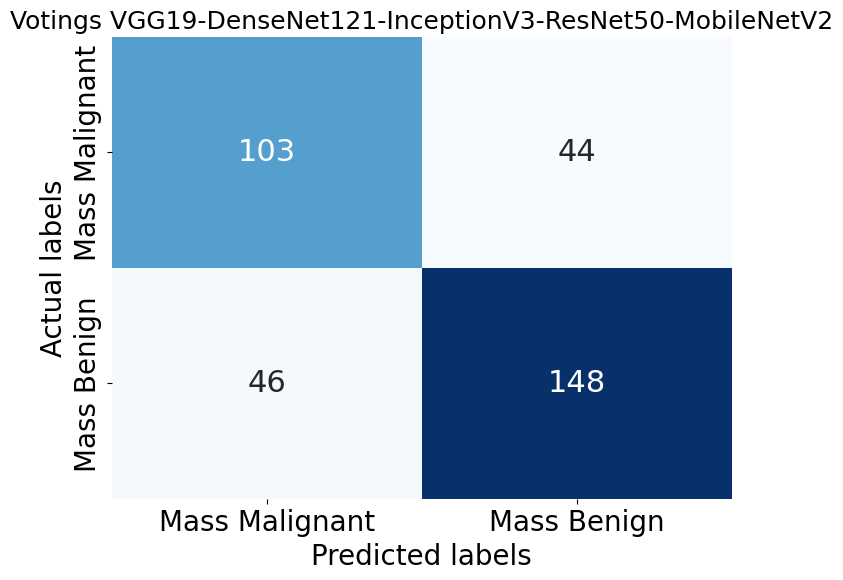

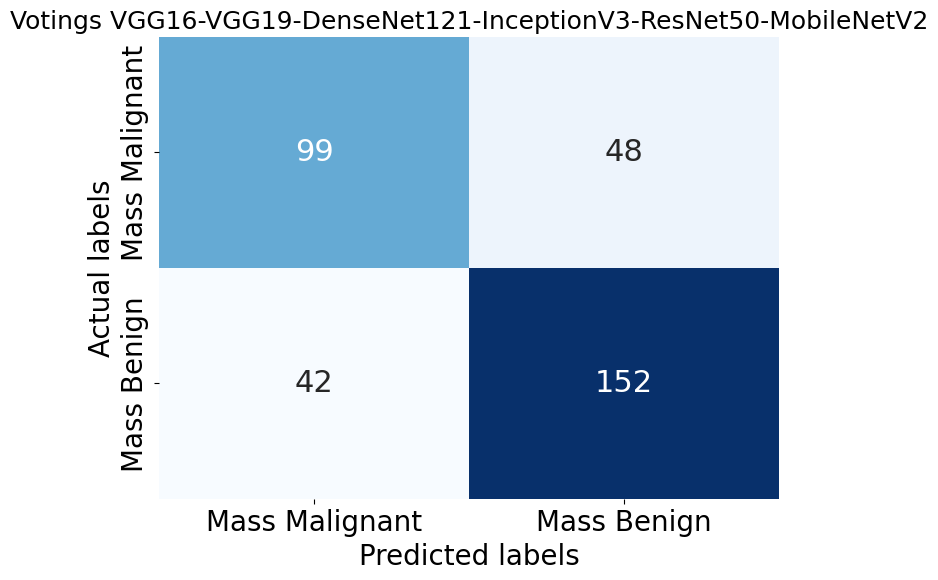

In [147]:
two_voting_results_list=[]
three_voting_results_list=[]
four_voting_results_list=[]
five_voting_results_list=[]
six_voting_results_list=[]
for x in subset_names:
    if len(x)==2:
        voting_stacked_preds = np.column_stack((cnns_and_preds[x[0]],cnns_and_preds[x[1]]))
        voting_names =  x[0] + '-' + x[1]
        df_metrics_and_models =  plot_voting_mc_test(voting_names,voting_stacked_preds,etiq_test_mass)# Y Test 
        two_voting_results_list.append(df_metrics_and_models)
    if len(x)==3:
        voting_stacked_preds = np.column_stack((cnns_and_preds[x[0]],cnns_and_preds[x[1]],cnns_and_preds[x[2]]))
        voting_names =  x[0] + '-' + x[1]+ '-' + x[2]
        df_metrics_and_models =  plot_voting_mc_test(voting_names,voting_stacked_preds,etiq_test_mass)# Y Test 
        three_voting_results_list.append(df_metrics_and_models)    
    if len(x) ==4:
        voting_stacked_preds = np.column_stack((cnns_and_preds[x[0]],cnns_and_preds[x[1]],cnns_and_preds[x[2]],cnns_and_preds[x[3]]))
        voting_names =  x[0] + '-' + x[1]+ '-' + x[2] + '-' + x[3]
        df_metrics_and_models =  plot_voting_mc_test(voting_names,voting_stacked_preds,etiq_test_mass)# Y Test 
        four_voting_results_list.append(df_metrics_and_models) 
    if len(x) ==5:
        voting_stacked_preds = np.column_stack((cnns_and_preds[x[0]],cnns_and_preds[x[1]],cnns_and_preds[x[2]],cnns_and_preds[x[3]],cnns_and_preds[x[4]]))
        voting_names =  x[0] + '-' + x[1]+ '-' + x[2] + '-' + x[3] + '-' + x[4]
        df_metrics_and_models =  plot_voting_mc_test(voting_names,voting_stacked_preds,etiq_test_mass)# Y Test 
        five_voting_results_list.append(df_metrics_and_models)    
    if len(x) == 6:
        voting_stacked_preds = np.column_stack((cnns_and_preds[x[0]],cnns_and_preds[x[1]],cnns_and_preds[x[2]],cnns_and_preds[x[3]],cnns_and_preds[x[4]], cnns_and_preds[x[5]]))
        voting_names =  x[0] + '-' + x[1]+ '-' + x[2] + '-' + x[3] + '-' + x[4] + '-' + x[5]
        df_metrics_and_models =  plot_voting_mc_test(voting_names,voting_stacked_preds,etiq_test_mass)# Y Test 
        six_voting_results_list.append(df_metrics_and_models) 


# Results

In [148]:
two_voting_results = pd.concat(two_voting_results_list, axis=0, ignore_index=False)
three_voting_results = pd.concat(three_voting_results_list, axis=0, ignore_index=False)
four_voting_results = pd.concat(four_voting_results_list, axis=0, ignore_index=False)
five_voting_results = pd.concat(five_voting_results_list, axis=0, ignore_index=False)
six_voting_results = pd.concat(six_voting_results_list, axis=0, ignore_index=False)


In [150]:
all_results = pd.concat((all_indiv_results,two_voting_results,three_voting_results,four_voting_results,five_voting_results,six_voting_results), axis=0, ignore_index=False)
all_results

,accuracy,f1,matthews_corrcoef,precision,recall
VGG16,0.721408,0.765432,0.426226,0.734597,0.798969
VGG19,0.744868,0.757660,0.499204,0.824242,0.701031
DenseNet121,0.709677,0.749367,0.405036,0.736318,0.762887
InceptionV3,0.744868,0.781955,0.476147,0.760976,0.804124
ResNet50,0.706745,0.757282,0.394317,0.715596,0.804124
...,...,...,...,...,...
VGG16-VGG19-DenseNet121-ResNet50-MobileNetV2,0.721408,0.759494,0.429110,0.746269,0.773196
VGG16-VGG19-InceptionV3-ResNet50-MobileNetV2,0.733138,0.769620,0.453185,0.756219,0.783505
VGG16-DenseNet121-InceptionV3-ResNet50-MobileNetV2,0.727273,0.768080,0.439320,0.743961,0.793814
VGG19-DenseNet121-InceptionV3-ResNet50-MobileNetV2,0.736070,0.766839,0.462837,0.770833,0.762887


In [155]:
all_results[all_results.accuracy>0.74]

,accuracy,f1,matthews_corrcoef,precision,recall
VGG19,0.744868,0.757660,0.499204,0.824242,0.701031
InceptionV3,0.744868,0.781955,0.476147,0.760976,0.804124
VGG16-VGG19,0.753666,0.781250,0.499583,0.789474,0.773196
VGG16-InceptionV3,0.741935,0.778894,0.470360,0.759804,0.798969
InceptionV3-ResNet50,0.747801,0.787129,0.481230,0.757143,0.819588
VGG16-VGG19-DenseNet121,0.741935,0.775510,0.472272,0.767677,0.783505
VGG16-VGG19-InceptionV3,0.747801,0.778351,0.485834,0.778351,0.778351
VGG16-VGG19-ResNet50,0.741935,0.775510,0.472272,0.767677,0.783505
VGG16-InceptionV3-ResNet50,0.747801,0.788177,0.480970,0.754717,0.824742
VGG19-DenseNet121-InceptionV3,0.741935,0.767196,0.479019,0.788043,0.747423


In [153]:
all_results[all_results.accuracy>0.75]

,accuracy,f1,matthews_corrcoef,precision,recall
VGG16-VGG19,0.753666,0.781250,0.499583,0.789474,0.773196
VGG16-VGG19-InceptionV3-ResNet50,0.753666,0.787879,0.495032,0.772277,0.804124


In [154]:
all_results.to_csv('votings_results_Mass.csv',index=True)

In [3]:
A = pd.read_csv(r'D:\Pruebas Parches Resize con TF\Clasif Mass\224\Best_CNNs\Votings\votings_results_Mass.csv')

In [8]:
A.head(6)

,Unnamed: 0,accuracy,f1,matthews_corrcoef,precision,recall
0,VGG16,0.721408,0.765432,0.426226,0.734597,0.798969
1,VGG19,0.744868,0.757660,0.499204,0.824242,0.701031
2,DenseNet121,0.709677,0.749367,0.405036,0.736318,0.762887
3,InceptionV3,0.744868,0.781955,0.476147,0.760976,0.804124
4,ResNet50,0.706745,0.757282,0.394317,0.715596,0.804124
5,MobileNetV2,0.689150,0.721053,0.370829,0.736559,0.706186


In [4]:
A[A.accuracy>0.74]

,Unnamed: 0,accuracy,f1,matthews_corrcoef,precision,recall
1,VGG19,0.744868,0.757660,0.499204,0.824242,0.701031
3,InceptionV3,0.744868,0.781955,0.476147,0.760976,0.804124
6,VGG16-VGG19,0.753666,0.781250,0.499583,0.789474,0.773196
8,VGG16-InceptionV3,0.741935,0.778894,0.470360,0.759804,0.798969
18,InceptionV3-ResNet50,0.747801,0.787129,0.481230,0.757143,0.819588
21,VGG16-VGG19-DenseNet121,0.741935,0.775510,0.472272,0.767677,0.783505
22,VGG16-VGG19-InceptionV3,0.747801,0.778351,0.485834,0.778351,0.778351
23,VGG16-VGG19-ResNet50,0.741935,0.775510,0.472272,0.767677,0.783505
28,VGG16-InceptionV3-ResNet50,0.747801,0.788177,0.480970,0.754717,0.824742
31,VGG19-DenseNet121-InceptionV3,0.741935,0.767196,0.479019,0.788043,0.747423


In [5]:
A[A.accuracy>0.75]

,Unnamed: 0,accuracy,f1,matthews_corrcoef,precision,recall
6,VGG16-VGG19,0.753666,0.781250,0.499583,0.789474,0.773196
44,VGG16-VGG19-InceptionV3-ResNet50,0.753666,0.787879,0.495032,0.772277,0.804124
